# Boston Marathon Analysis (2015, 2016, 2017)

## Data is from: https://www.kaggle.com/rojour/boston-results - thank you!
- Note: There are 42.195 km in one marathon

## Navigating This Notebook
1. After loading the data, I transform the features and explore the 2015 data in depth with visuals. 
    - Transforming Features:
        - convert time marks which are strings to integers (seconds)
        - convert columns names to integers so will graph correctly
        - remove unused data
2. Then I combine all three datasets and try to build a model that predicts one's overall time and age.
3. I also looked more closely at the top racers across all 3 years.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
# Load Data
data2015 = pd.read_csv("marathon_data/marathon_results_2015.csv")
data2016 = pd.read_csv("marathon_data/marathon_results_2016.csv")
data2017 = pd.read_csv("marathon_data/marathon_results_2017.csv")

## Explore 2015 Data

In [3]:
print(data2015.shape)
print(' \nmissing values \n')
print(data2015.isna().sum())
print('\nunique values\n')
print(data2015.nunique())

(26598, 25)
 
missing values 

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             2551
Country              0
Citizen          25534
Unnamed: 9       26531
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

unique values

Unnamed: 0       26598
Bib              26598
Name             26540
Age                 65
M/F                  2
City              5616
State               69
Country             79
Citizen             82
Unnamed: 9           2
5K                1328
10K               2435
15K               3480
20K               4541
Half              4746
25K               55

In [4]:
data2015.head()

Unnamed: 0 Bib                   Name  Age M/F         City State Country  \
0           0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH   
1           1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH   
2           2   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN   
3           3  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN   
4           4  10          Korir, Wesley   32   M       Kitale   NaN     KEN   

  Citizen Unnamed: 9  ...      25K      30K      35K      40K     Pace  \
0     NaN        NaN  ...  1:16:07  1:32:00  1:47:59  2:02:39  0:04:56   
1     NaN        NaN  ...  1:16:07  1:31:59  1:47:59  2:02:42  0:04:58   
2     NaN        NaN  ...  1:16:07  1:32:00  1:47:59  2:03:01  0:04:59   
3     NaN        NaN  ...  1:16:07  1:32:00  1:48:03  2:03:47  0:05:00   
4     NaN        NaN  ...  1:16:07  1:32:00  1:47:59  2:03:27  0:05:00   

  Proj Time Official Time Overall Gender Division  
0         -       2:09:17       1      1        1  
1         -       2:09:48       2      2        2  
2         -       2:10:22       3      3        3  
3         -       2:10:47       4      4        4  
4         -       2:10:49       5      5        5  

[5 rows x 25 columns]

In [5]:
data2015.drop(columns = ['Unnamed: 0', 'Unnamed: 9', 'Proj Time', 'Citizen'], inplace = True)
data2015.head()

Bib                   Name  Age M/F         City State Country       5K  \
0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH  0:14:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH  0:14:43   
2   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN  0:14:43   
3  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN  0:14:43   
4  10          Korir, Wesley   32   M       Kitale   NaN     KEN  0:14:43   

       10K      15K  ...     Half      25K      30K      35K      40K  \
0  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59  2:02:39   
1  0:29:43  0:44:58  ...  1:04:01  1:16:07  1:31:59  1:47:59  2:02:42   
2  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59  2:03:01   
3  0:29:44  0:45:01  ...  1:04:02  1:16:07  1:32:00  1:48:03  2:03:47   
4  0:29:44  0:44:58  ...  1:04:01  1:16:07  1:32:00  1:47:59  2:03:27   

      Pace Official Time Overall  Gender  Division  
0  0:04:56       2:09:17       1       1         1  
1  0:04:58       2:09:48       2       2         2  
2  0:04:59       2:10:22       3       3         3  
3  0:05:00       2:10:47       4       4         4  
4  0:05:00       2:10:49       5       5         5  

[5 rows x 21 columns]

In [6]:
data2015.isna().sum()

Bib                 0
Name                0
Age                 0
M/F                 0
City                0
State            2551
Country             0
5K                  0
10K                 0
15K                 0
20K                 0
Half                0
25K                 0
30K                 0
35K                 0
40K                 0
Pace                0
Official Time       0
Overall             0
Gender              0
Division            0
dtype: int64

In [7]:
data2015[data2015.State != data2015.State]

Bib                   Name  Age M/F          City State Country  \
0          3         Desisa, Lelisa   25   M          Ambo   NaN     ETH   
1          4  Tsegay, Yemane Adhane   30   M   Addis Ababa   NaN     ETH   
2          8         Chebet, Wilson   29   M      Marakwet   NaN     KEN   
3         11       Kipyego, Bernard   28   M       Eldoret   NaN     KEN   
4         10          Korir, Wesley   32   M        Kitale   NaN     KEN   
...      ...                    ...  ...  ..           ...   ...     ...   
26559  24014            Wang, Genqi   65   M       Beijing   NaN     CHN   
26573  10618         Ebina, Hiroshi   55   M         Tokyo   NaN     JPN   
26583   8178           Jeon, Soojin   35   F         Ulsan   NaN     KOR   
26584    217          Park, Hyoseok   39   M      Ansan-Si   NaN     KOR   
26586   6769       Alkhub, Mohammed   56   M  Redfern, Nsw   NaN     AUS   

            5K      10K      15K  ...     Half      25K      30K      35K  \
0      0:14:43  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59   
1      0:14:43  0:29:43  0:44:58  ...  1:04:01  1:16:07  1:31:59  1:47:59   
2      0:14:43  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59   
3      0:14:43  0:29:44  0:45:01  ...  1:04:02  1:16:07  1:32:00  1:48:03   
4      0:14:43  0:29:44  0:44:58  ...  1:04:01  1:16:07  1:32:00  1:47:59   
...        ...      ...      ...  ...      ...      ...      ...      ...   
26559  0:28:18  1:06:09  1:49:11  ...  2:41:37  3:16:51  4:03:55  4:50:43   
26573  0:29:18  1:02:07  1:38:55  ...  2:25:50  3:03:55  3:58:56  4:55:05   
26583  0:33:33  1:07:30  1:43:02  ...  2:41:51  3:21:25  4:14:18  5:08:25   
26584  0:33:33  1:07:31  1:43:02  ...  2:41:50  3:21:25  4:14:18  5:08:25   
26586  0:29:38  0:59:52  1:33:21  ...  2:14:36  2:51:29  3:56:38  5:02:49   

           40K     Pace Official Time Overall  Gender  Division  
0      2:02:39  0:04:56       2:09:17       1       1         1  
1      2:02:42  0:04:58       2:09:48       2       2         2  
2      2:03:01  0:04:59       2:10:22       3       3         3  
3      2:03:47  0:05:00       2:10:47       4       4         4  
4      2:03:27  0:05:00       2:10:49       5       5         5  
...        ...      ...           ...     ...     ...       ...  
26559        -  0:13:57       6:05:29   26560   14560       402  
26573  5:45:20  0:14:03       6:08:05   26574   14566      1496  
26583  6:02:28  0:14:45       6:26:29   26584   12013      6004  
26584  6:02:28  0:14:45       6:26:29   26585   14572      4963  
26586  6:07:36  0:15:09       6:37:04   26587   14574      1497  

[2551 rows x 21 columns]

## Explore 2016 Data

In [8]:
print(data2016.shape)
print(' \nmissing values \n')
print(data2016.isna().sum())
print('\nunique \n')
print(data2016.nunique())

(26630, 24)
 
missing values 

Bib                  0
Name                 0
Age                  0
M/F                  0
City                 1
State             2847
Country              0
Citizen          25508
Unnamed: 8       26547
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

unique 

Bib              26630
Name             26559
Age                 65
M/F                  2
City              5832
State               67
Country             79
Citizen             90
Unnamed: 8           2
5K                1299
10K               2460
15K               3549
20K               4600
Half              4825
25K               5688
30K               6715
35K               7763
40K

In [9]:
data2016.drop(columns = ['Citizen', 'Unnamed: 8', 'Proj Time'], inplace = True)
data2016.isna().sum()

Bib                 0
Name                0
Age                 0
M/F                 0
City                1
State            2847
Country             0
5K                  0
10K                 0
15K                 0
20K                 0
Half                0
25K                 0
30K                 0
35K                 0
40K                 0
Pace                0
Official Time       0
Overall             0
Gender              0
Division            0
dtype: int64

In [10]:
data2016[data2016.State != data2016.State]

Bib                      Name  Age M/F            City State Country  \
0          5       Hayle, Lemi Berhanu   21   M     Addis Ababa   NaN     ETH   
1          1            Desisa, Lelisa   26   M            Ambo   NaN     ETH   
2          6     Tsegay, Yemane Adhane   31   M     Addis Ababa   NaN     ETH   
3         11             Korir, Wesley   33   M          Kitale   NaN     KEN   
4         14          Lonyangata, Paul   23   M         Eldoret   NaN     KEN   
...      ...                       ...  ...  ..             ...   ...     ...   
26481  25226              Chavez, Irma   25   F       Chihuahua   NaN     MEX   
26512  30921         Hauschild, Doerte   44   F         Hamburg   NaN     GER   
26558  30195       Vieuvel, Frederique   43   F  Fort De France   NaN     FRA   
26594  21161  Englaro, Mihaela Ivanova   40   F      Concorezzo   NaN     ITA   
26616  10942            Ebina, Hiroshi   56   M           Tokyo   NaN     JPN   

            5K      10K      15K  ...     Half      25K      30K      35K  \
0      0:15:47  0:31:20  0:47:07  ...  1:06:45  1:19:15  1:34:17  1:50:24   
1      0:15:47  0:31:21  0:47:08  ...  1:06:46  1:19:15  1:34:17  1:50:24   
2      0:15:46  0:31:20  0:47:07  ...  1:06:44  1:19:15  1:34:45  1:50:48   
3      0:15:46  0:31:21  0:47:07  ...  1:06:46  1:19:16  1:34:45  1:50:48   
4      0:15:46  0:31:21  0:47:08  ...  1:06:46  1:19:18  1:34:46  1:51:30   
...        ...      ...      ...  ...      ...      ...      ...      ...   
26481  0:29:52  1:01:06  1:36:43  ...  2:21:37  3:14:44  4:01:29  4:49:26   
26512  0:33:39  1:13:03  1:54:16  ...  2:45:05  3:19:34  4:05:58  4:53:41   
26558  0:36:13  1:08:56  1:47:56  ...  2:43:05  3:20:26  4:10:51  4:57:57   
26594  0:31:03  1:07:45  1:45:27  ...  2:35:08  3:11:52  4:03:52  4:54:39   
26616  0:31:27  1:06:43  1:44:55  ...  2:40:26  3:21:17  4:17:29  5:13:52   

           40K     Pace Official Time Overall  Gender  Division  
0      2:05:59  0:05:04       2:12:45       1       1         1  
1      2:05:59  0:05:06       2:13:32       2       2         2  
2      2:06:47  0:05:07       2:14:02       3       3         3  
3      2:06:47  0:05:07       2:14:05       4       4         4  
4      2:08:11  0:05:11       2:15:45       5       5         5  
...        ...      ...           ...     ...     ...       ...  
26481  5:37:30  0:13:39       5:57:44   26481   12079      5903  
26512  5:40:05  0:13:43       5:59:36   26512   12101      1925  
26558  5:43:54  0:13:49       6:01:59   26558   12127      1931  
26594  5:45:24  0:14:00       6:07:01   26594   12148      1936  
26616  6:09:13  0:15:02       6:33:43   26616   14456      1562  

[2847 rows x 21 columns]

## Explore 2017 Data

In [11]:
print(data2017.shape)
print(' \nmissing values \n')
print(data2017.isna().sum())
print('\nunique \n')
print(data2017.nunique())

(26410, 25)
 
missing values 

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             3595
Country              0
Citizen          25156
Unnamed: 9       26319
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

unique 

Unnamed: 0       26410
Bib              26410
Name             26365
Age                 66
M/F                  2
City              5926
State               68
Country             91
Citizen             85
Unnamed: 9           2
5K                1327
10K               2475
15K               3597
20K               4719
Half              4921
25K               5808
30K

In [12]:
data2017.drop(columns = ['Citizen', 'Unnamed: 0', 'Unnamed: 9', 'Proj Time'], inplace = True)
data2017.isna().sum()

Bib                 0
Name                0
Age                 0
M/F                 0
City                0
State            3595
Country             0
5K                  0
10K                 0
15K                 0
20K                 0
Half                0
25K                 0
30K                 0
35K                 0
40K                 0
Pace                0
Official Time       0
Overall             0
Gender              0
Division            0
dtype: int64

In [13]:
data2017[data2017.State != data2017.State]

Bib                Name  Age M/F                City State Country  \
0         11     Kirui, Geoffrey   24   M            Keringet   NaN     KEN   
2         23       Osako, Suguru   25   M        Machida-City   NaN     JPN   
4          9      Chebet, Wilson   31   M            Marakwet   NaN     KEN   
7          7         Sefir, Dino   28   M         Addis Ababa   NaN     ETH   
11         6      Tsegay, Yemane   32   M         Addis Ababa   NaN     ETH   
...      ...                 ...  ...  ..                 ...   ...     ...   
26341  25797           Zhu, Jing   53   F  Shenzhen Guangdong   NaN     CHN   
26382  23144       Fong, Sut Sam   48   F           Hong Kong   NaN     HKG   
26387  23458  Pulido, Jose I Sr.   66   M              Bogota   NaN     COL   
26391   6893       Ueda, Akifumi   58   M          Himeji-Shi   NaN     JPN   
26395   4631      Choon Hon, Lim   33   M           Singapore   NaN     SIN   

            5K      10K      15K  ...     Half      25K      30K      35K  \
0      0:15:25  0:30:28  0:45:44  ...  1:04:35  1:16:59  1:33:01  1:48:19   
2      0:15:25  0:30:29  0:45:44  ...  1:04:36  1:17:00  1:33:01  1:48:31   
4      0:15:25  0:30:28  0:45:44  ...  1:04:35  1:16:59  1:33:01  1:48:41   
7      0:15:24  0:30:28  0:46:13  ...  1:06:04  1:18:36  1:34:52  1:51:11   
11     0:15:24  0:30:27  0:45:44  ...  1:04:36  1:17:30  1:34:33  1:52:00   
...        ...      ...      ...  ...      ...      ...      ...      ...   
26341  0:30:50  1:02:53  1:37:03  ...  2:24:12  3:05:58  3:59:13  4:55:05   
26382  0:33:30  1:09:43  1:49:08  ...  2:40:36  3:37:13  4:25:58  5:12:27   
26387  0:29:35  1:01:18  1:35:23  ...  2:22:49  3:11:21  4:05:10  5:01:15   
26391  0:28:48  1:00:28  1:36:41  ...  2:30:26  3:12:18  4:04:39  5:00:22   
26395  0:38:23  1:21:54  2:03:34  ...  3:01:16  3:43:59  4:34:10  5:22:42   

           40K     Pace Official Time Overall  Gender  Division  
0      2:02:53  0:04:57       2:09:37       1       1         1  
2      2:03:38  0:04:59       2:10:28       3       3         3  
4      2:05:00  0:05:04       2:12:35       5       5         5  
7      2:07:09  0:05:08       2:14:26       8       8         7  
11     2:08:57  0:05:14       2:16:47      12      12        11  
...        ...      ...           ...     ...     ...       ...  
26341  5:45:07  0:13:54       6:04:09   26343   11943      1222  
26382  5:55:04  0:14:15       6:13:26   26384   11968      1862  
26387  5:52:45  0:14:23       6:16:50   26389   14420       424  
26391  5:56:59  0:14:39       6:24:03   26393   14424      1537  
26395  6:11:55  0:15:11       6:37:48   26397   14428      4769  

[3595 rows x 21 columns]

## Visualize 2015 Data

In [14]:
data2015.head()

Bib                   Name  Age M/F         City State Country       5K  \
0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH  0:14:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH  0:14:43   
2   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN  0:14:43   
3  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN  0:14:43   
4  10          Korir, Wesley   32   M       Kitale   NaN     KEN  0:14:43   

       10K      15K  ...     Half      25K      30K      35K      40K  \
0  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59  2:02:39   
1  0:29:43  0:44:58  ...  1:04:01  1:16:07  1:31:59  1:47:59  2:02:42   
2  0:29:43  0:44:57  ...  1:04:02  1:16:07  1:32:00  1:47:59  2:03:01   
3  0:29:44  0:45:01  ...  1:04:02  1:16:07  1:32:00  1:48:03  2:03:47   
4  0:29:44  0:44:58  ...  1:04:01  1:16:07  1:32:00  1:47:59  2:03:27   

      Pace Official Time Overall  Gender  Division  
0  0:04:56       2:09:17       1       1         1  
1  0:04:58       2:09:48       2       2         2  
2  0:04:59       2:10:22       3       3         3  
3  0:05:00       2:10:47       4       4         4  
4  0:05:00       2:10:49       5       5         5  

[5 rows x 21 columns]

In [15]:
data2015[data2015.Name == 'Morgan, John'] # Bib & year = unique identifier

Bib          Name  Age M/F            City State Country       5K  \
1592    3954  Morgan, John   44   M   Grand Prairie    TX     USA  0:20:38   
13405  17299  Morgan, John   56   M  Corpus Christi    TX     USA  0:26:43   
20111  24943  Morgan, John   53   M         Adelphi    MD     USA  0:25:31   

           10K      15K  ...     Half      25K      30K      35K      40K  \
1592   0:40:47  1:01:16  ...  1:26:06  1:42:12  2:03:35  2:24:59  2:46:06   
13405  0:53:44  1:19:02  ...  1:50:22  2:10:39  2:37:23  3:03:31  3:29:02   
20111  0:51:53  1:18:30  ...  1:51:19  2:12:53  2:42:19  3:13:42  3:51:03   

          Pace Official Time Overall  Gender  Division  
1592   0:06:41       2:55:12    1593    1513       190  
13405  0:08:24       3:40:00   13406    9152       666  
20111  0:09:27       4:07:22   20112   11788      1708  

[3 rows x 21 columns]

In [16]:
# convert strings to time (seconds)
def get_seconds(time):
    if time == '-':
        return None
    if time == '2:58:81': # must have been an error recording or scraping data - assume it is 2:58:00
        time = '2:58:00'
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

In [17]:
data2015['5K_time'] = data2015['5K'].apply(lambda x: get_seconds(x))
data2015['10K_time'] = data2015['10K'].apply(lambda x: get_seconds(x))
data2015['15K_time'] = data2015['15K'].apply(lambda x: get_seconds(x))
data2015['20K_time'] = data2015['20K'].apply(lambda x: get_seconds(x))
data2015['Half_time'] = data2015['Half'].apply(lambda x: get_seconds(x))
data2015['25K_time'] = data2015['25K'].apply(lambda x: get_seconds(x))
data2015['30K_time'] = data2015['30K'].apply(lambda x: get_seconds(x))
data2015['35K_time'] = data2015['35K'].apply(lambda x: get_seconds(x))
data2015['40K_time'] = data2015['40K'].apply(lambda x: get_seconds(x))
data2015['Official_time'] = data2015['Official Time'].apply(lambda x: get_seconds(x))

In [18]:
data2015.head()

Bib                   Name  Age M/F         City State Country       5K  \
0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH  0:14:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH  0:14:43   
2   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN  0:14:43   
3  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN  0:14:43   
4  10          Korir, Wesley   32   M       Kitale   NaN     KEN  0:14:43   

       10K      15K  ... 5K_time 10K_time 15K_time 20K_time Half_time  \
0  0:29:43  0:44:57  ...   883.0   1783.0   2697.0   3629.0    3842.0   
1  0:29:43  0:44:58  ...   883.0   1783.0   2698.0   3628.0    3841.0   
2  0:29:43  0:44:57  ...   883.0   1783.0   2697.0   3629.0    3842.0   
3  0:29:44  0:45:01  ...   883.0   1784.0   2701.0   3629.0    3842.0   
4  0:29:44  0:44:58  ...   883.0   1784.0   2698.0   3628.0    3841.0   

  25K_time 30K_time 35K_time  40K_time  Official_time  
0   4567.0   5520.0   6479.0    7359.0         7757.0  
1   4567.0   5519.0   6479.0    7362.0         7788.0  
2   4567.0   5520.0   6479.0    7381.0         7822.0  
3   4567.0   5520.0   6483.0    7427.0         7847.0  
4   4567.0   5520.0   6479.0    7407.0         7849.0  

[5 rows x 31 columns]

In [19]:
print("There are {} male runners.".format(data2015[data2015['M/F'] == 'M'].shape[0]))
print("There are {} female runners.".format(data2015[data2015['M/F'] == 'F'].shape[0]))

There are 14581 male runners.
There are 12017 female runners.


In [20]:
# convert distance column names into numbers (to more accurately represent how far along they are in a marathon)
marathon_distance = 42.195
data2015.rename(columns={"Official_time": 42.195, "40K_time": 40,
                        "35K_time": 35, "30K_time": 30, "25K_time": 25,
                        "Half_time": 21.0975, "20K_time": 20, "15K_time": 15,
                        "10K_time": 10, "5K_time": 5},
               inplace = True)

In [21]:
time_data = data2015[[5, 10, 15, 20, 21.0975, 25, 30, 35, 40, 42.195, 'M/F']]
time_data.dtypes

5          float64
10         float64
15         float64
20         float64
21.0975    float64
25         float64
30         float64
35         float64
40         float64
42.195     float64
M/F         object
dtype: object

In [22]:
# split data by gender
males2015 = time_data[time_data['M/F'] == 'M']
females2015 = time_data[time_data['M/F'] == 'F']

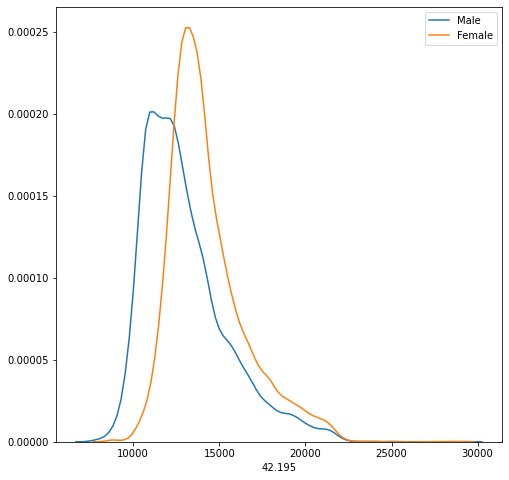

In [23]:
# plot distribution of official times
plt.figure(figsize = (8, 8))
sbs.distplot(males2015[42.195], hist = False, label = "Male")
sbs.distplot(females2015[42.195], hist = False, label = "Female")
plt.legend()

### - Male distribution is wider --> expect larger standard deviation
### - Male distribution has a lower mean --> expect lower times for men

In [24]:
# Get gender standard deviations and averages
male_std2015 = males2015.std()
female_std2015 = females2015.std()

male_means2015 = males2015.mean()
female_means2015 = females2015.mean()

all_std2015 = time_data.std()
all_means2015 = time_data.mean()

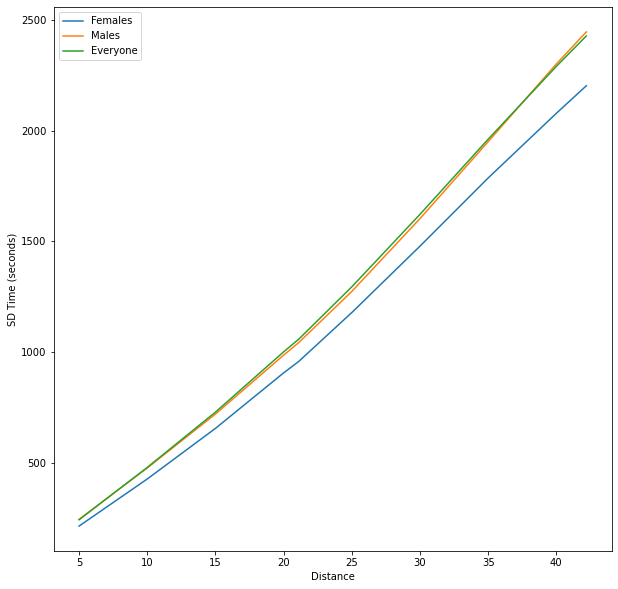

In [25]:
# Plot standard deviations
plt.figure(figsize = (10, 10))

plt.plot(female_std2015, label = "Females")
plt.plot(male_std2015, label = "Males")
plt.plot(all_std2015, label = "Everyone")

plt.xlabel("Distance")
plt.ylabel("SD Time (seconds)")

plt.legend()

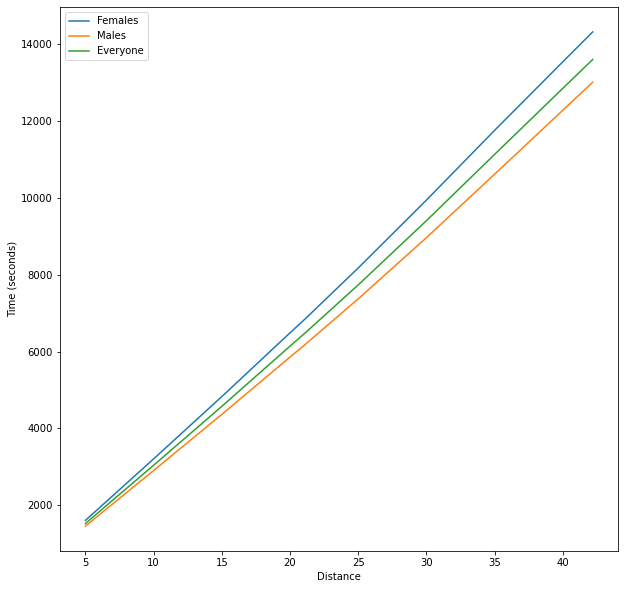

In [26]:
# Plot averages
plt.figure(figsize = (10, 10))

plt.plot(female_means2015, label = "Females")
plt.plot(male_means2015, label = "Males")
plt.plot(all_means2015, label = "Everyone")

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

No handles with labels found to put in legend.


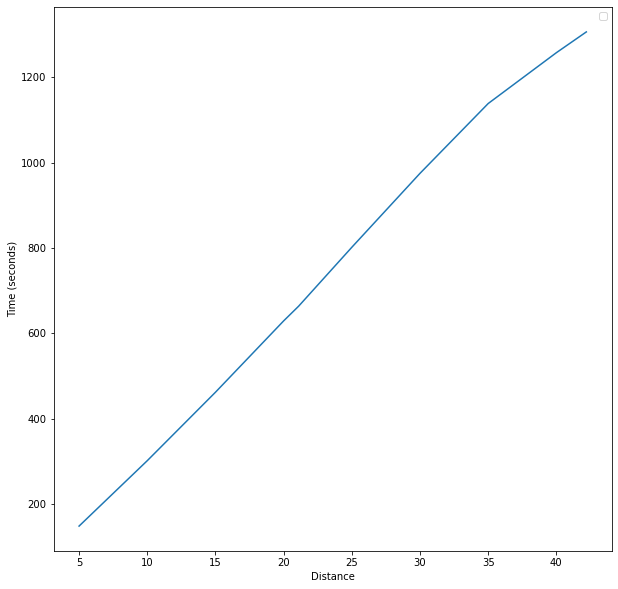

In [27]:
# Plot differences in average times across the genders
plt.figure(figsize = (10, 10))

plt.plot(female_means2015 - male_means2015)

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

### Average distance and times are linearly related ->average pace is constant throughout the race

In [28]:
# compare time differences based on placement by gender
rankings2015 = data2015[[5, 10, 15, 20, 21.0975, 25, 30, 35, 40, 42.195, 'M/F', 'Gender']]
rankings2015.head()

5      10      15      20  21.0975      25      30      35      40  \
0  883.0  1783.0  2697.0  3629.0   3842.0  4567.0  5520.0  6479.0  7359.0   
1  883.0  1783.0  2698.0  3628.0   3841.0  4567.0  5519.0  6479.0  7362.0   
2  883.0  1783.0  2697.0  3629.0   3842.0  4567.0  5520.0  6479.0  7381.0   
3  883.0  1784.0  2701.0  3629.0   3842.0  4567.0  5520.0  6483.0  7427.0   
4  883.0  1784.0  2698.0  3628.0   3841.0  4567.0  5520.0  6479.0  7407.0   

   42.195 M/F  Gender  
0  7757.0   M       1  
1  7788.0   M       2  
2  7822.0   M       3  
3  7847.0   M       4  
4  7849.0   M       5

In [29]:
rankingsFemale = rankings2015[rankings2015['M/F'] == 'F']
rankingsMale = rankings2015[rankings2015['M/F'] == 'M']

In [30]:
times = [5, 10, 15, 20, 21.0975, 25, 30, 35, 40, 42.195]
df = pd.DataFrame(columns = times)
for rank in range(1, 12018):
    f = rankingsFemale[rankingsFemale.Gender == rank][times]
    m = rankingsMale[rankingsMale.Gender == rank][times]
    row = pd.DataFrame(f.values - m.values, columns = times)
    df = df.append(row)

In [31]:
df.head()

5.0000   10.0000  15.0000  20.0000  21.0975  25.0000  30.0000  35.0000  \
0    136.0    281.0    412.0    511.0    523.0    601.0    684.0    771.0   
0    135.0    280.0    410.0    512.0    524.0    601.0    684.0    771.0   
0    134.0    280.0    412.0    512.0    523.0    602.0    684.0    771.0   
0    137.0    280.0    407.0    511.0    523.0    601.0    683.0    766.0   
0    136.0    280.0    411.0    513.0    525.0    602.0    684.0    771.0   

   40.0000  42.1950  
0    891.0    938.0  
0    888.0    911.0  
0    869.0    887.0  
0    844.0    892.0  
0    875.0    916.0

No handles with labels found to put in legend.


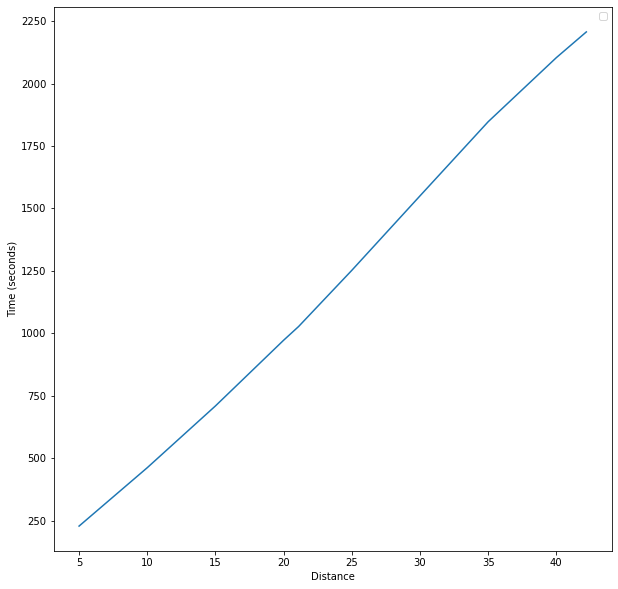

In [32]:
# Plot average time differences
plt.figure(figsize = (10, 10))

plt.plot(df.mean())

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

### The difference in times increases linearly with the distance BUT it's important to note that we didn't look at the very bottom rankings of men (b/c there were more men than women). We know the top 10% of men are faster on average than the top 10% of women on average (based on the plots), but we don't know if the bottom 10% of men are slower or faster than the bottom 10% of women. Let's check it out!

In [33]:
num_men = rankingsMale.Gender.max()
num_women = rankingsFemale.Gender.max()

print("Total Men: {}".format(num_men))
print("Total Women: {}".format(num_women))

print("Top 10% Men: {} - {}".format(1, np.round(.1*num_men)))
print("Top 10% Women: {} - {}".format(1, np.round(.1*num_women)))

print("Bottom 10% Men: {} - {}".format(np.round(.9*num_men), num_men))
print("Bottom 10% Women: {} - {}".format(np.round(.9*num_women), num_women))

Total Men: 14581
Total Women: 12017
Top 10% Men: 1 - 1458.0
Top 10% Women: 1 - 1202.0
Bottom 10% Men: 13123.0 - 14581
Bottom 10% Women: 10815.0 - 12017


In [34]:
topMales = rankingsMale[rankingsMale.Gender <= 1458].drop(columns = ['M/F', 'Gender'])
topFemales = rankingsFemale[rankingsFemale.Gender <= 1202].drop(columns = ['M/F', 'Gender'])

bottomMales = rankingsMale[rankingsMale.Gender >= 13123].drop(columns = ['M/F', 'Gender'])
bottomFemales = rankingsFemale[rankingsFemale.Gender >= 10815].drop(columns = ['M/F', 'Gender'])

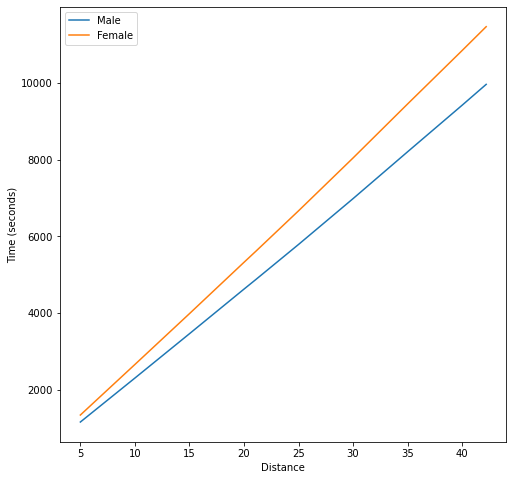

In [35]:
# Plot top men and women times
plt.figure(figsize = (8, 8))

plt.plot(topMales.mean(), label = "Male")
plt.plot(topFemales.mean(), label = "Female")

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

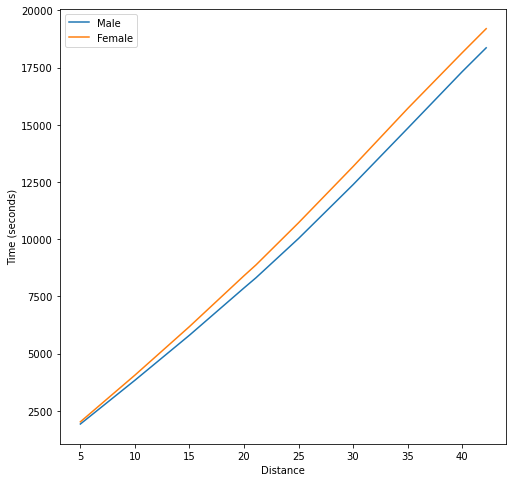

In [36]:
# Plot bottom women and men times
plt.figure(figsize = (8, 8))

plt.plot(bottomMales.mean(), label = "Male")
plt.plot(bottomFemales.mean(), label = "Female")

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

### Gap between male and female seems to widen for both top and bottom racers. Let's take a closer look at the bottom racers though.

In [37]:
# Get difference in times between men and women in the bottom 10% of times
times = [5, 10, 15, 20, 21.0975, 25, 30, 35, 40, 42.195]
df = pd.DataFrame(columns = times)
for f_rank in range(10815, 12018):
    m_rank = f_rank + 2308
    f = rankingsFemale[rankingsFemale.Gender == f_rank][times]
    m = rankingsMale[rankingsMale.Gender == m_rank][times]
    row = pd.DataFrame(f.values - m.values, columns = times)
    df = df.append(row)

No handles with labels found to put in legend.


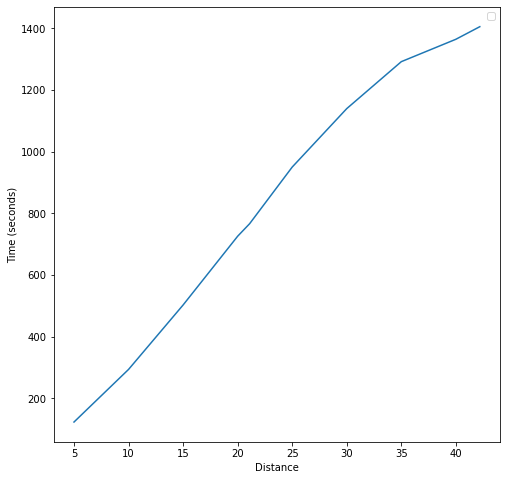

In [39]:
# Plot average time difference among the bottom 10% of racers
plt.figure(figsize = (8, 8))

plt.plot(df.mean())

plt.xlabel("Distance")
plt.ylabel("Time (seconds)")

plt.legend()

### The difference in times is still linear for the bottom 10% of racers,  but it is less steep at the very end of the race. This could mean that there is a smaller difference between times of the bottom female and male racers compared to the top female and male racers.

In [40]:
# Look at Pair Plots

In [41]:
diff_times = [5, 20, 35, 42.195]
early_times = [5, 10, 15, 42.195]
late_times = [20, 25, 30, 42.195]
end_times = [35, 40, 42.195]

In [42]:
plt.rcParams.update({'font.size': 35})

<Figure size 1080x1080 with 0 Axes>

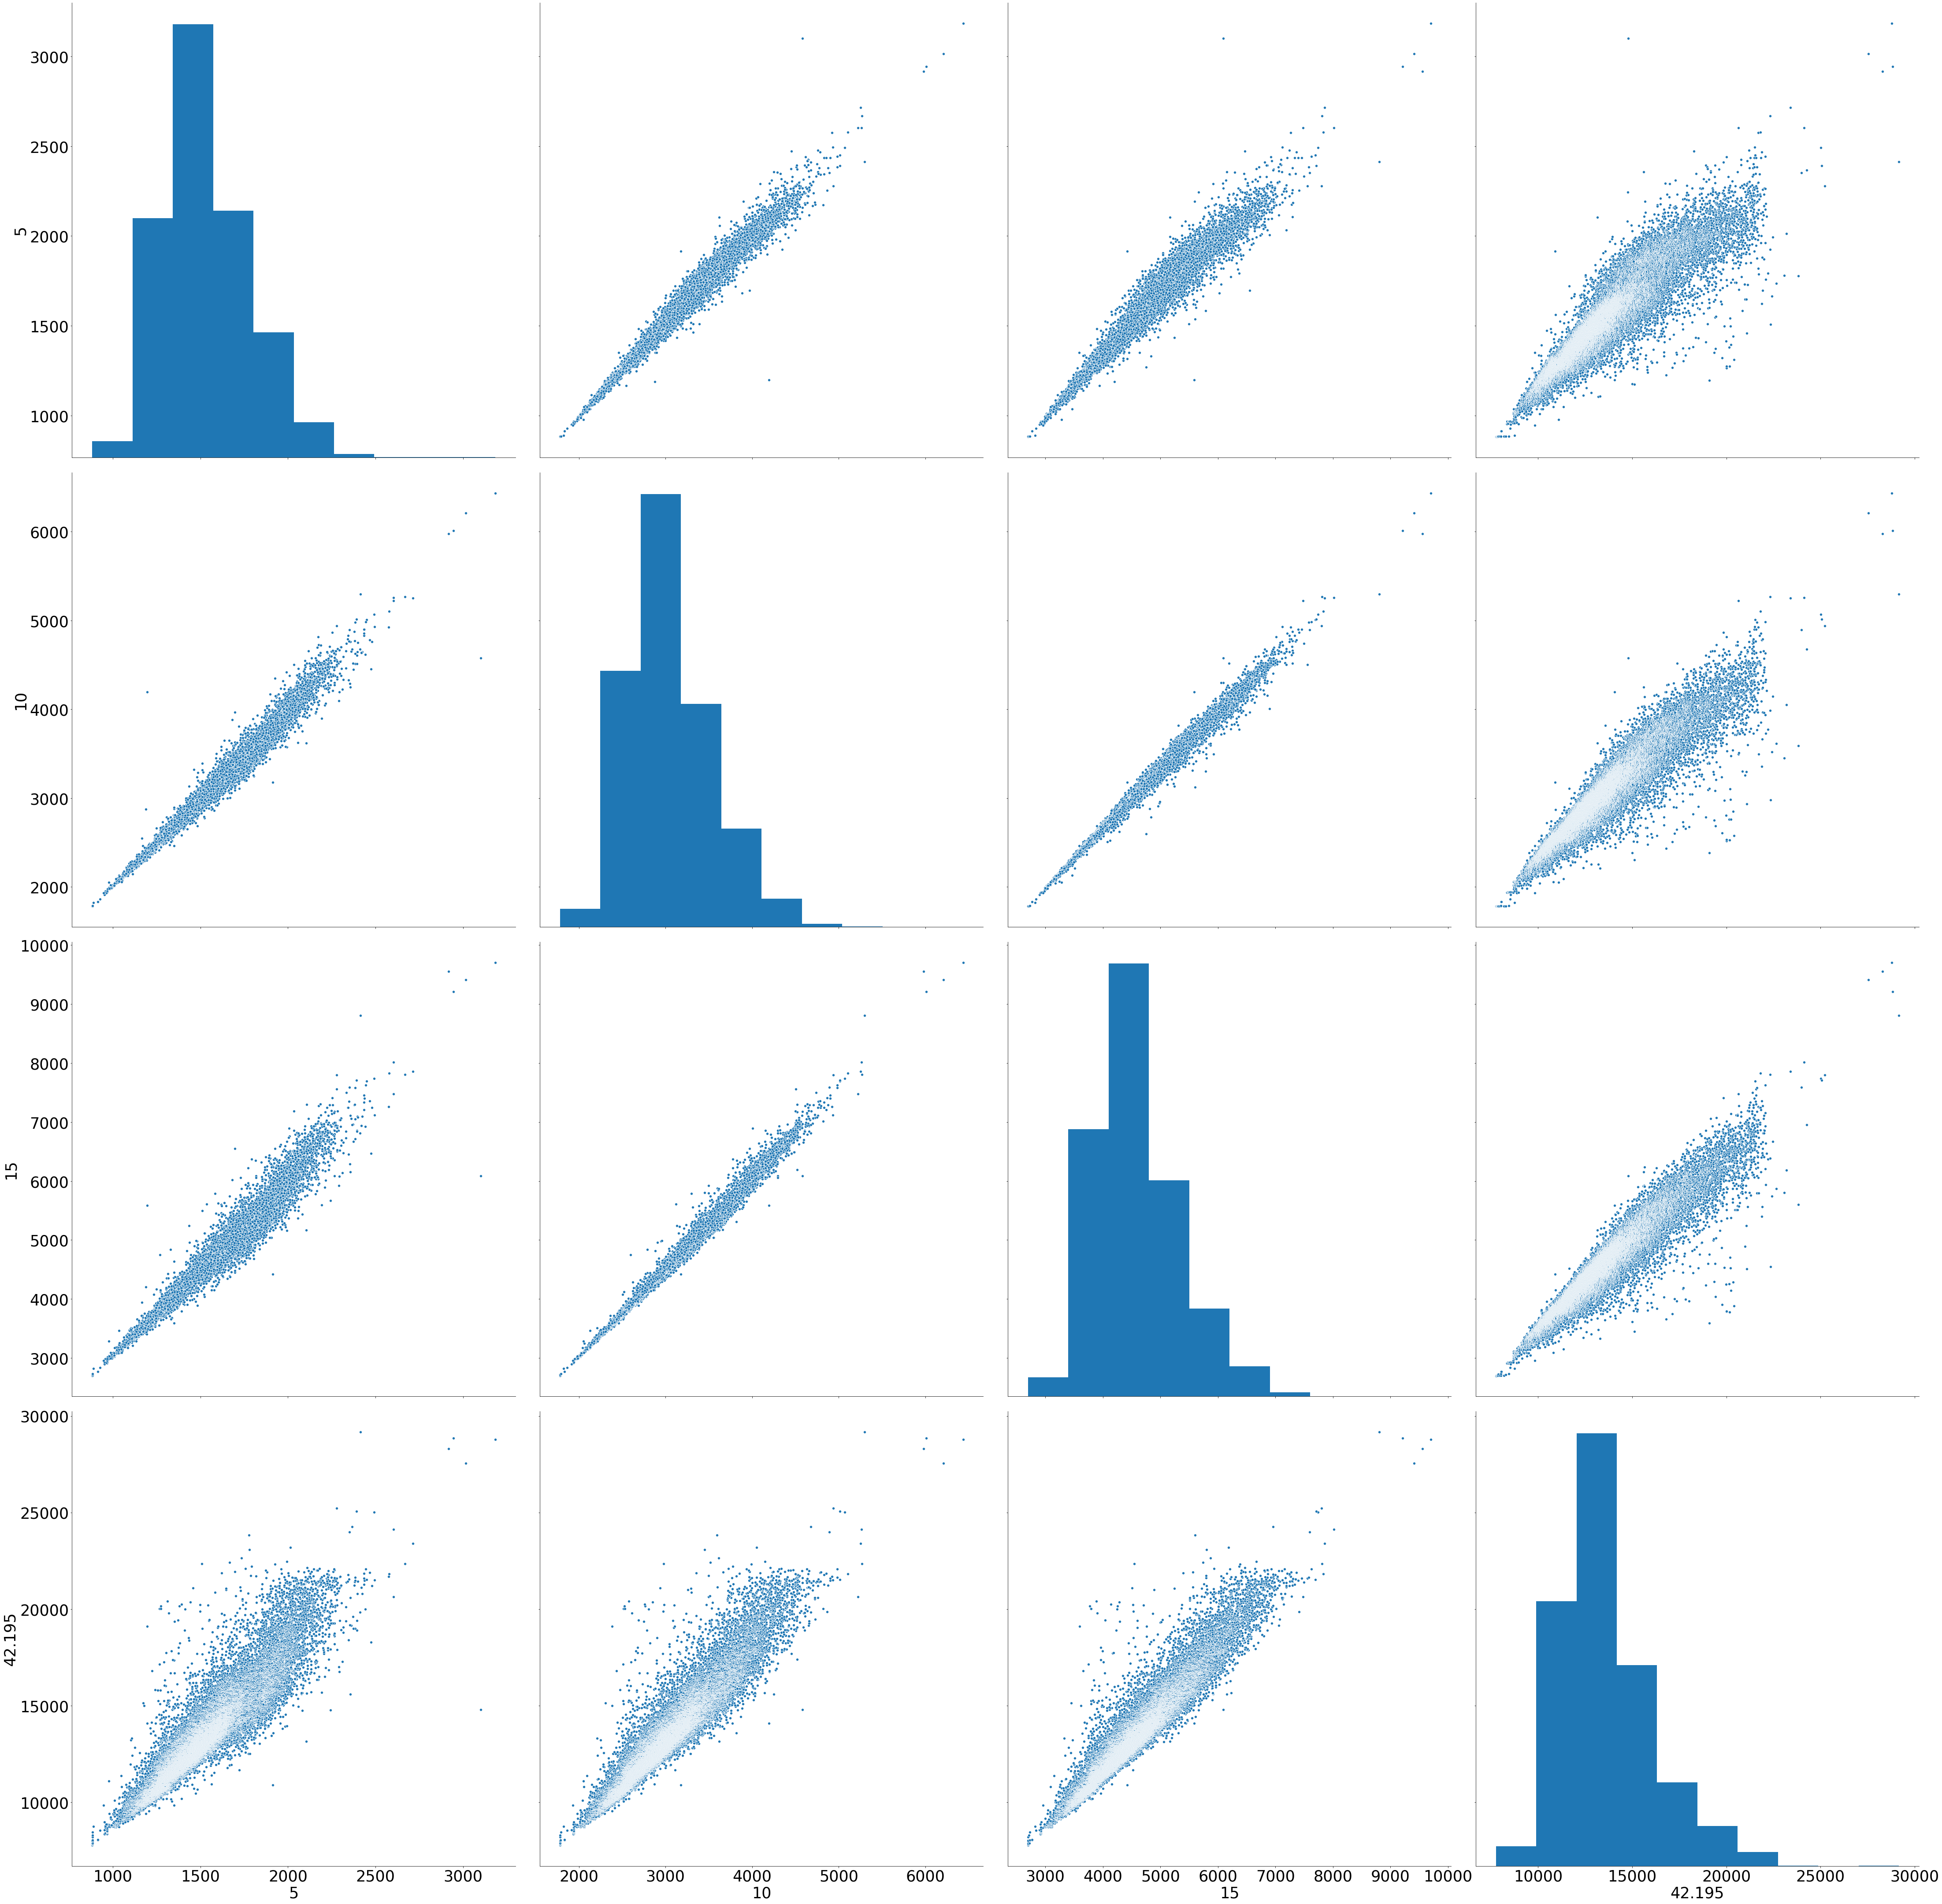

In [43]:
plt.figure(figsize = (15, 15))

sbs.pairplot(time_data, vars = early_times, 
             height = 15)

<Figure size 1080x1080 with 0 Axes>

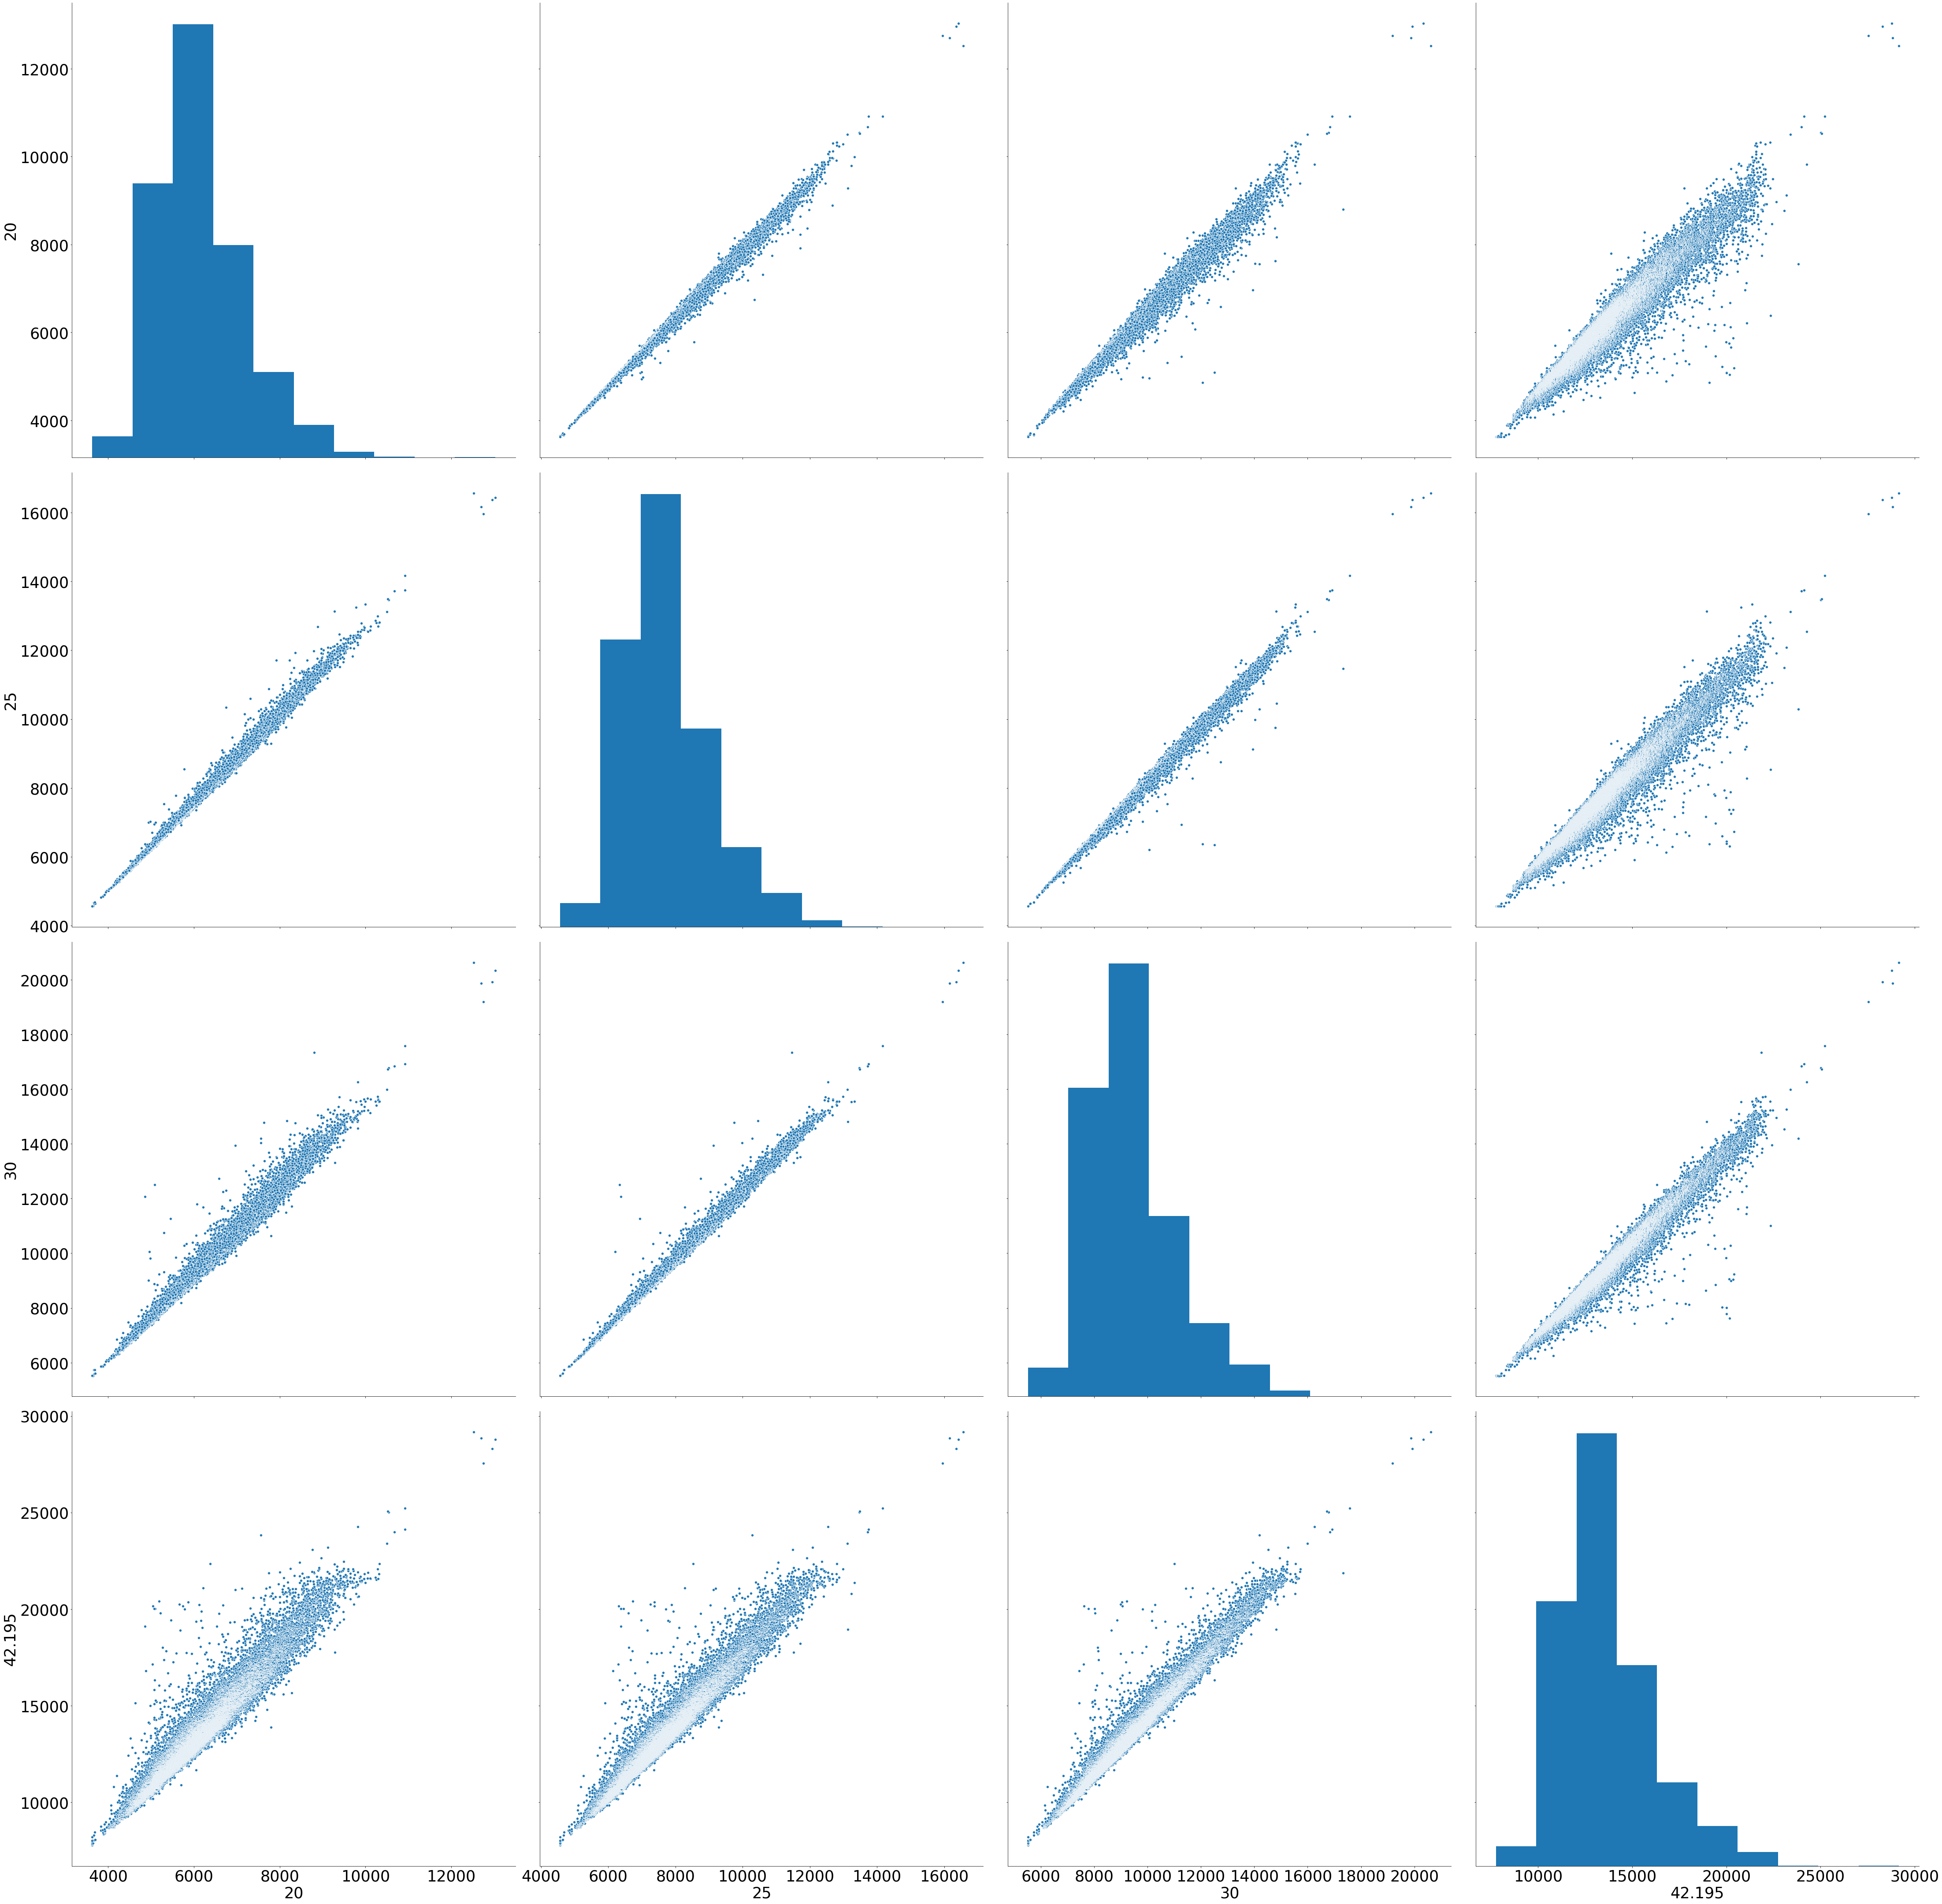

In [44]:
plt.figure(figsize = (15, 15))

sbs.pairplot(time_data, vars = late_times, 
             height = 15)

<Figure size 1080x1080 with 0 Axes>

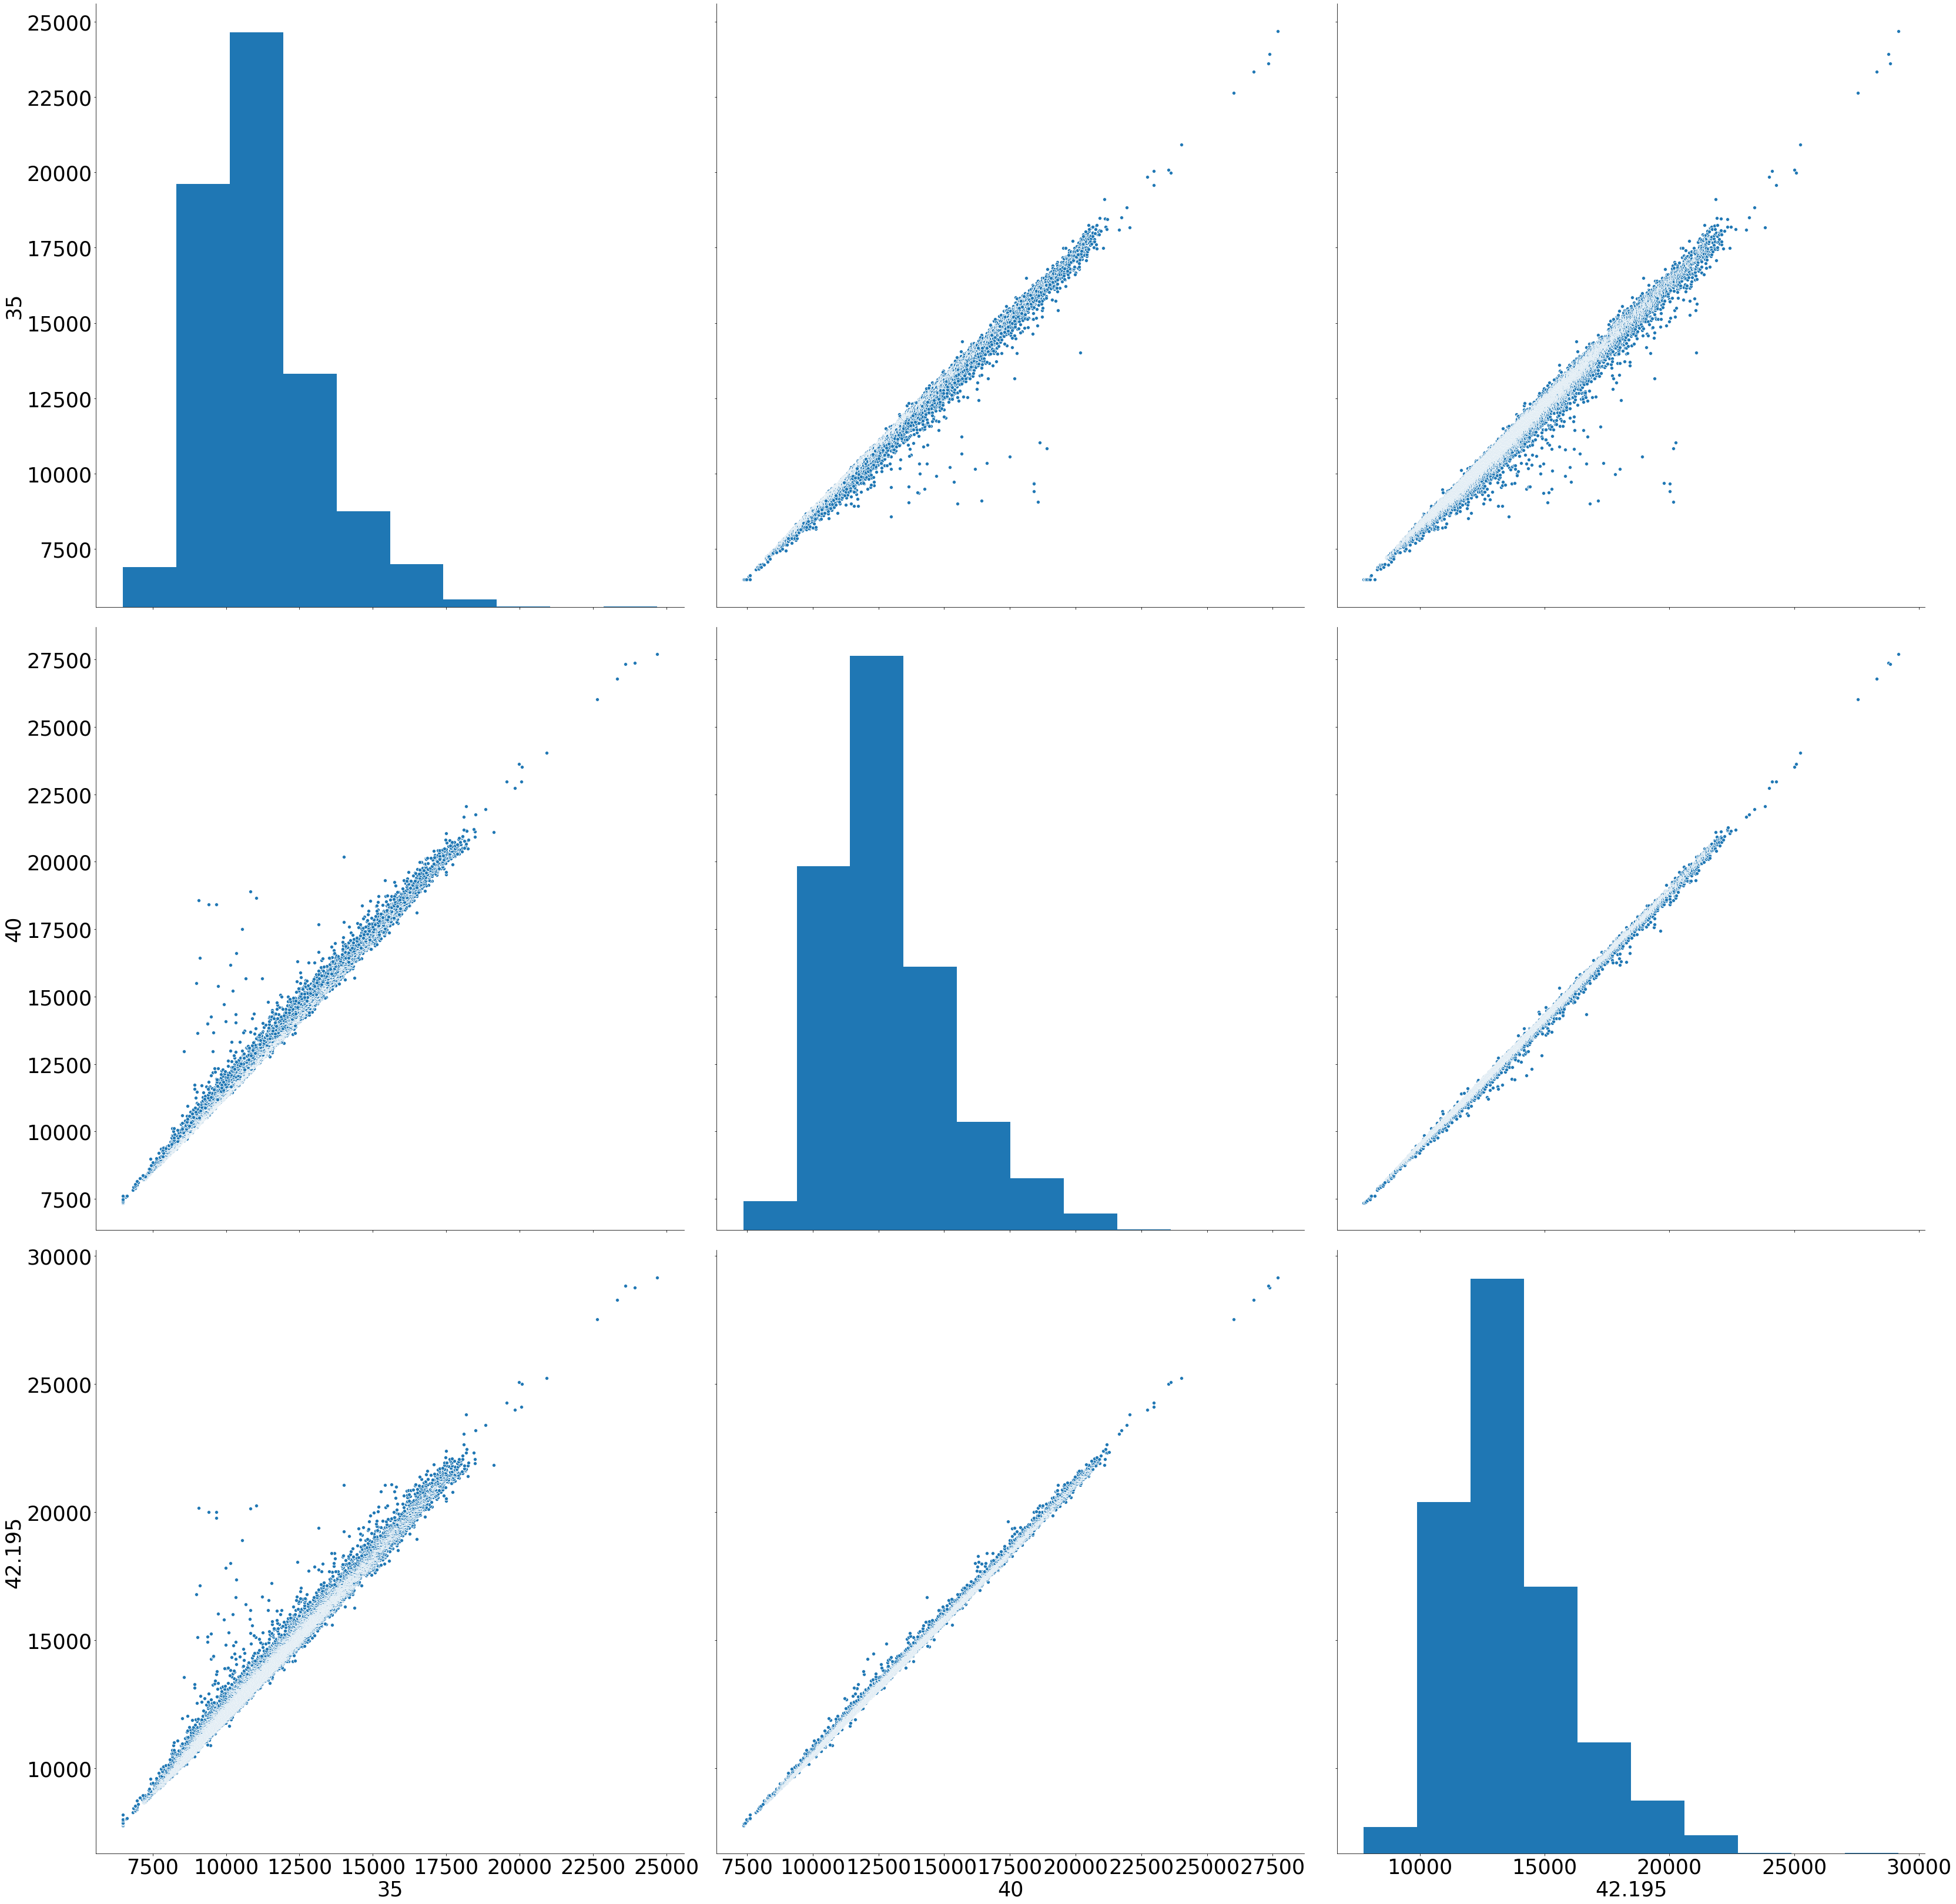

In [45]:
plt.figure(figsize = (15, 15))

sbs.pairplot(time_data, vars = end_times, 
             height = 15)

<Figure size 1080x1080 with 0 Axes>

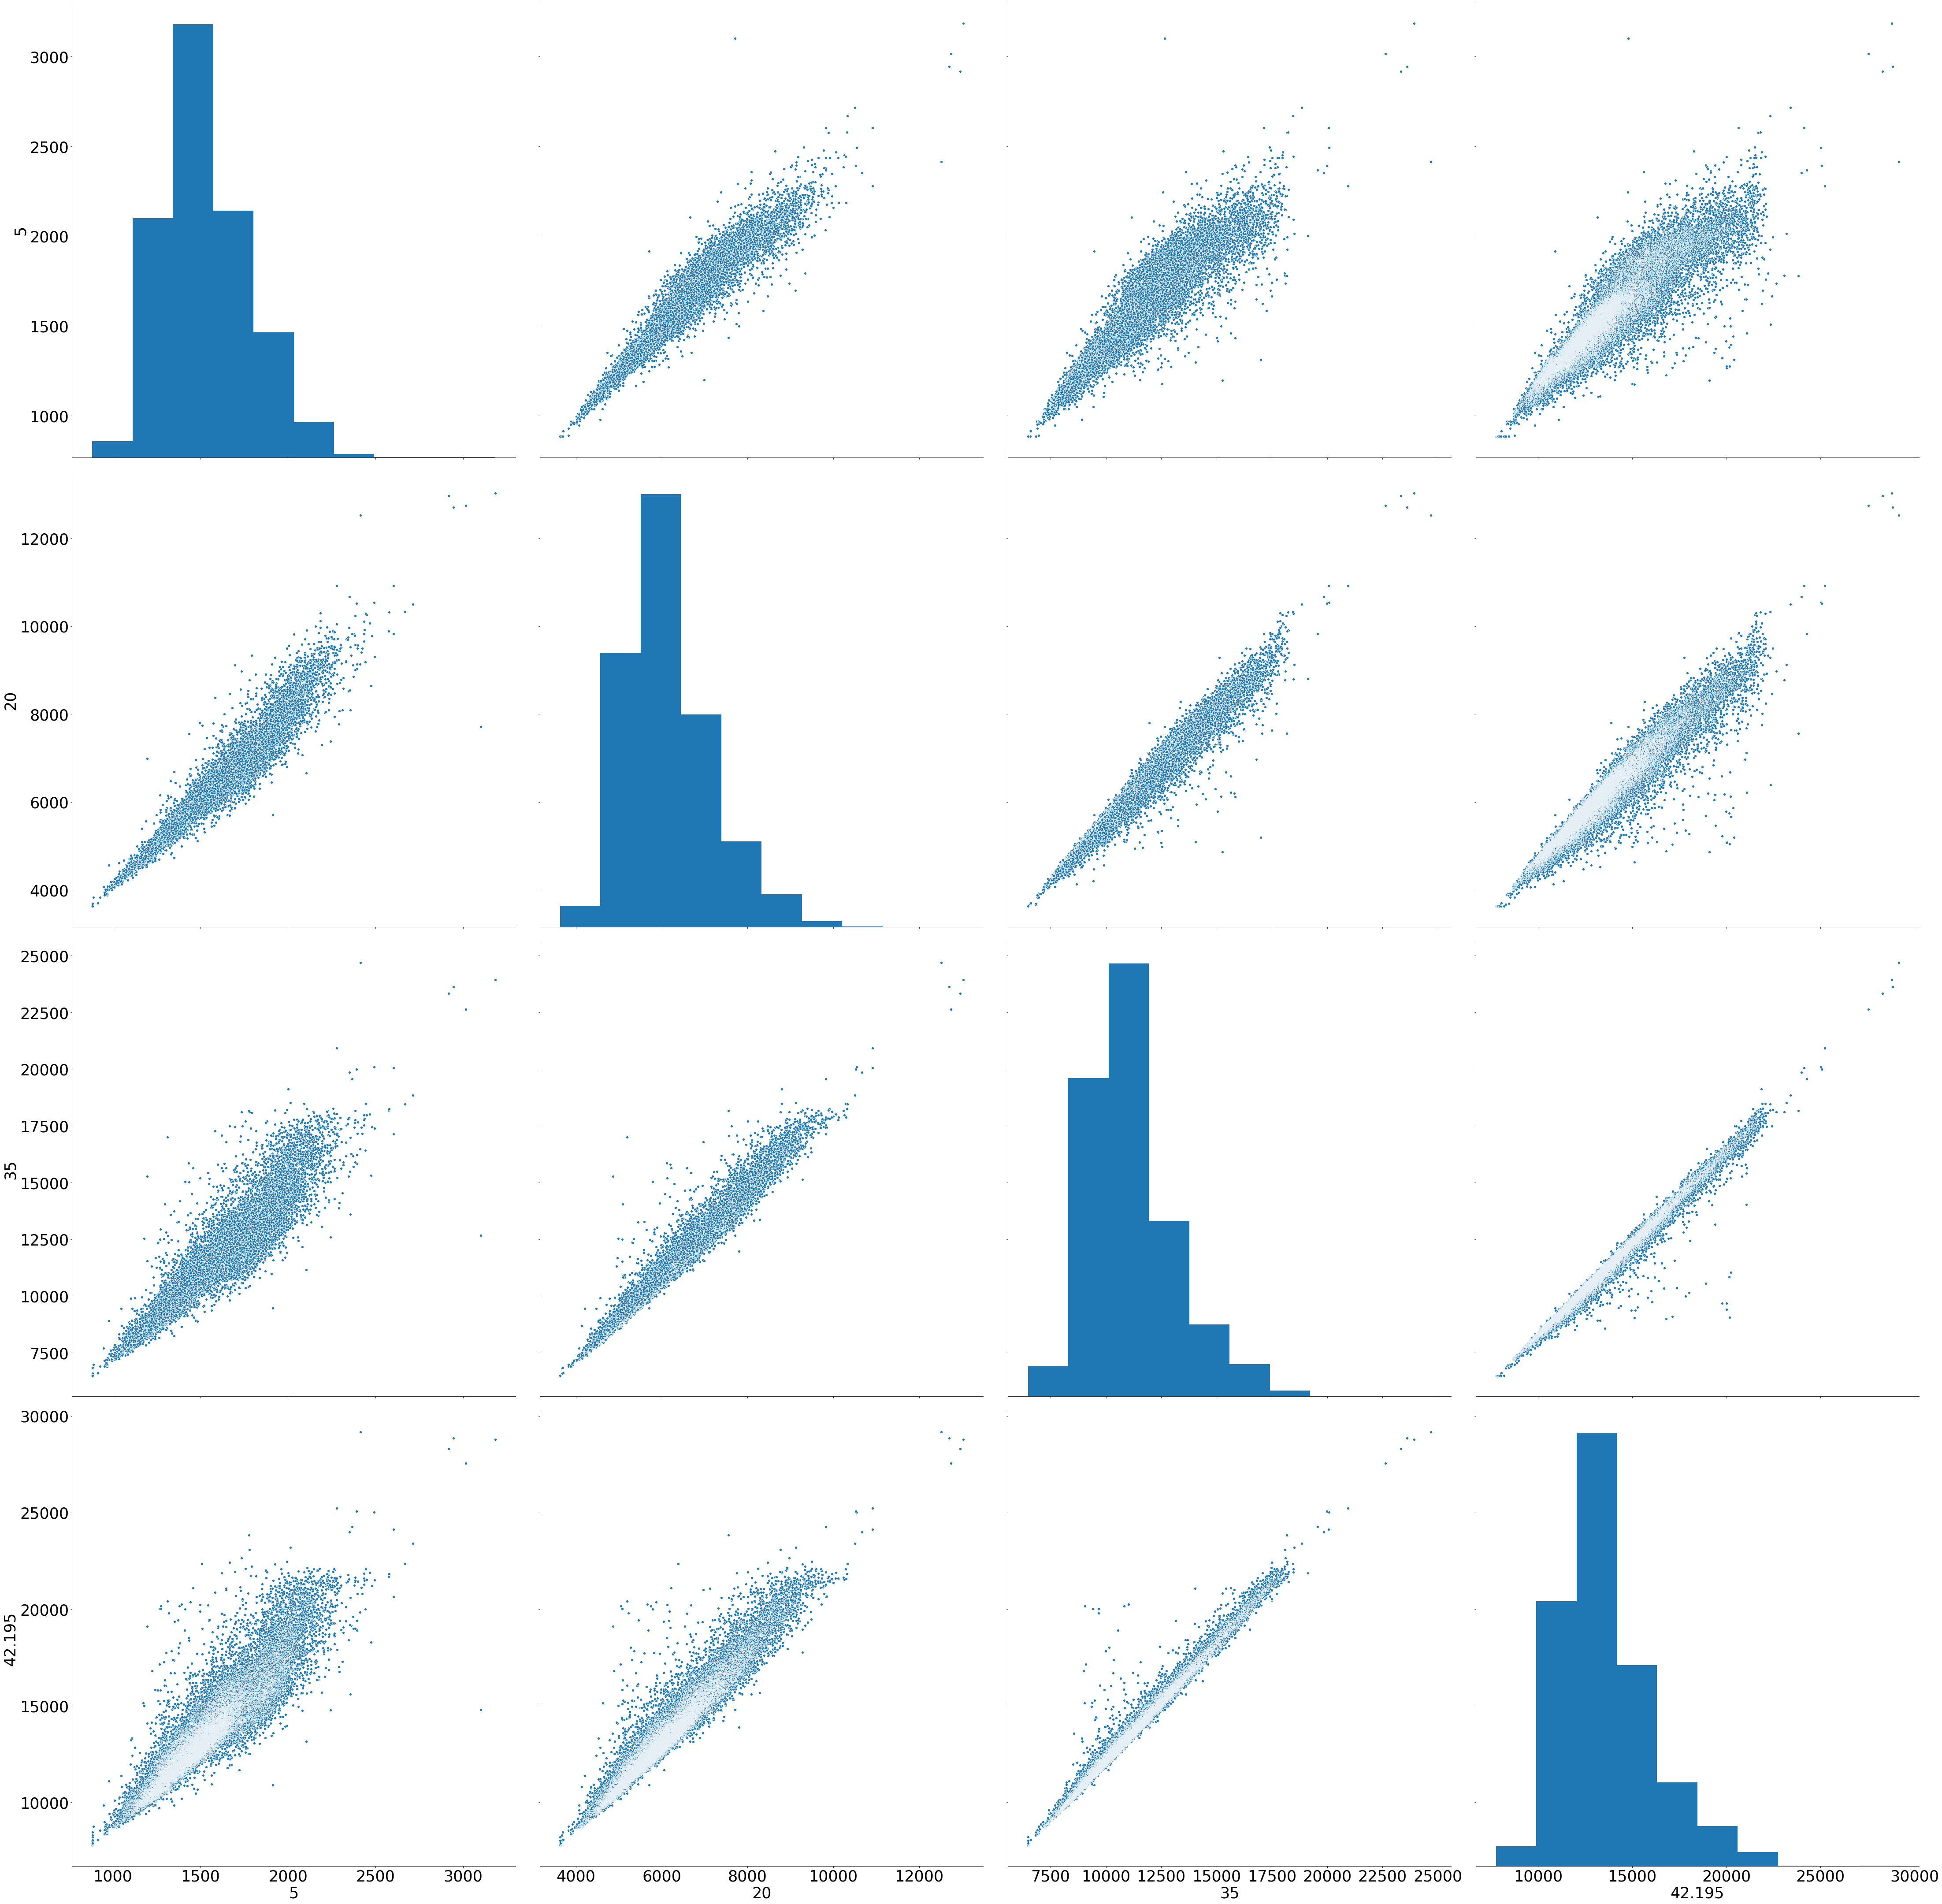

In [46]:
plt.figure(figsize = (15, 15))

sbs.pairplot(time_data, vars = diff_times, 
             height = 15)

In [47]:
# Correlation Heatmap
time_data.corr()
print(time_data.corr().min())

5          0.915273
10         0.937123
15         0.951242
20         0.962111
21.0975    0.963861
25         0.962394
30         0.950794
35         0.938116
40         0.922310
42.195     0.915273
dtype: float64


### - High correlations b/w the times --> not surprising b/c graphs were very linear
### - The pairplots show that lower times had smaller variance (dots are closer together near the lower left hand corner) --> this makes sense b/c ppl who have lower times probably train more and so they have disciplined pacing and/or more experience racing

## Combine All Three Datasets

In [143]:
data2015['Year'] = 2015
data2016['Year'] = 2016
data2017['Year'] = 2017

# add unique identifier (name and bib are not unique)
data2015['UniqueID'] = "2015" + data2015['Bib']
data2016['UniqueID'] = "2016" + data2016['Bib']
data2017['UniqueID'] = "2017" + data2017['Bib']

In [144]:
# Transform 2016 Data
data2016['5K_time'] = data2016['5K'].apply(lambda x: get_seconds(x))
data2016['10K_time'] = data2016['10K'].apply(lambda x: get_seconds(x))
data2016['15K_time'] = data2016['15K'].apply(lambda x: get_seconds(x))
data2016['20K_time'] = data2016['20K'].apply(lambda x: get_seconds(x))
data2016['Half_time'] = data2016['Half'].apply(lambda x: get_seconds(x))
data2016['25K_time'] = data2016['25K'].apply(lambda x: get_seconds(x))
data2016['30K_time'] = data2016['30K'].apply(lambda x: get_seconds(x))
data2016['35K_time'] = data2016['35K'].apply(lambda x: get_seconds(x))
data2016['40K_time'] = data2016['40K'].apply(lambda x: get_seconds(x))
data2016['Official_time'] = data2016['Official Time'].apply(lambda x: get_seconds(x))

data2016.rename(columns={"Official_time": 42.195, "40K_time": 40,
                        "35K_time": 35, "30K_time": 30, "25K_time": 25,
                        "Half_time": 21.0975, "20K_time": 20, "15K_time": 15,
                        "10K_time": 10, "5K_time": 5},
               inplace = True)

In [145]:
# Transform 2017 Data
data2017['5K_time'] = data2017['5K'].apply(lambda x: get_seconds(x))
data2017['10K_time'] = data2017['10K'].apply(lambda x: get_seconds(x))
data2017['15K_time'] = data2017['15K'].apply(lambda x: get_seconds(x))
data2017['20K_time'] = data2017['20K'].apply(lambda x: get_seconds(x))
data2017['Half_time'] = data2017['Half'].apply(lambda x: get_seconds(x))
data2017['25K_time'] = data2017['25K'].apply(lambda x: get_seconds(x))
data2017['30K_time'] = data2017['30K'].apply(lambda x: get_seconds(x))
data2017['35K_time'] = data2017['35K'].apply(lambda x: get_seconds(x))
data2017['40K_time'] = data2017['40K'].apply(lambda x: get_seconds(x))
data2017['Official_time'] = data2017['Official Time'].apply(lambda x: get_seconds(x))

data2017.rename(columns={"Official_time": 42.195, "40K_time": 40,
                        "35K_time": 35, "30K_time": 30, "25K_time": 25,
                        "Half_time": 21.0975, "20K_time": 20, "15K_time": 15,
                        "10K_time": 10, "5K_time": 5},
               inplace = True)

In [146]:
columns = ['Bib', 'Age', 'M/F', 'Country', 5, 10, 15, 20, 21.0975, 25, 30, 35, 40, 42.195,
           'Gender', 'Overall', 'Division', 'Year', 'UniqueID']

In [147]:
print(data2015.shape)
print(data2016.shape)
print(data2017.shape)

(26598, 33)
(26630, 43)
(26410, 43)


In [148]:
df = pd.concat([data2015[columns], data2016[columns]])

ValueError: Plan shapes are not aligned

In [ ]:
df.shape

In [ ]:
df = pd.concat([df, data2017[columns]])
df.shape

In [ ]:
df.head()

In [ ]:
print(df.Age.min())
print(df.Age.max())

In [ ]:
# create Age ranges
df['age_bins'] = pd.cut(x=df['Age'], bins=[17, 29, 39, 49, 59, 69, 79, 89],
                       labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s'])

In [ ]:
df[['age_bins', 'Age']].head()

In [ ]:
df.nunique()

In [ ]:
# Correlation Heatmap
corr = df.corr()
print(corr.min())
corr

### The correlation between 'Overall' and each time (columns 5 - 42.195) is greater than the correlation between 'Gender' and each time (columns 5 - 42.195).

### Year has very low correlation between all other features.

## Predict Final Time

In [149]:
df.dropna(inplace = True)

In [150]:
df.isna().sum()

Bib         0
Age         0
M/F         0
Country     0
5           0
10          0
15          0
20          0
21.0975     0
25          0
30          0
35          0
40          0
42.195      0
Gender      0
Overall     0
Division    0
Year        0
UniqueID    0
age_bins    0
dtype: int64

#### Random forest - use age, gender, country and rank to predict final time

In [151]:
# features and target 
features = ['age_bins', 'M/F', 'Country', 'Gender']
target = 42.195

In [152]:
X = df[features]
y = df[target]

In [153]:
# preprocess categorical features
le = preprocessing.LabelEncoder()

le.fit(X['M/F'])
X['gender'] = le.transform(X['M/F']) 

le.fit(X['age_bins'])
X['Age'] = le.transform(X['age_bins'])

le.fit(X['Country'])
X['country'] = le.transform(X['Country']) 

<ipython-input-153-c26c34e4b0a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.transform(X['M/F'])
<ipython-input-153-c26c34e4b0a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = le.transform(X['age_bins'])
<ipython-input-153-c26c34e4b0a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [154]:
X.head()

age_bins M/F Country  Gender  gender  Age  country
0      20s   M     ETH       1       1    0       32
1      30s   M     ETH       2       1    1       32
2      20s   M     KEN       3       1    0       53
3      20s   M     KEN       4       1    0       53
4      30s   M     KEN       5       1    1       53

In [155]:
X.nunique()

age_bins        7
M/F             2
Country       104
Gender      14577
gender          2
Age             7
country       104
dtype: int64

In [156]:
x = X[['Age', 'gender', 'country', 'Gender']]

In [157]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [158]:
X_train.head()

Age  gender  country  Gender
22203    0       1       99   12651
18798    2       1       99   11277
26445    3       1       99   14509
25523    4       1       52   14071
4106     0       0       99     314

In [159]:
# Regression Tree
regressor = RandomForestRegressor(random_state=19)
cross_val_score(regressor, x, y, cv=10)

array([ 0.52447304, -1.04893988,  0.20296564,  0.91862153,  0.71290267,
        0.81675202,  0.93068443,  0.53669418, -0.07613025,  0.80948447])

In [160]:
regressor.fit(X_train, y_train)
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [161]:
# MSE
print(mean_squared_error(y_train, train_pred))
print(mean_squared_error(y_test, test_pred))

# R2
print(r2_score(y_train, train_pred))
print(r2_score(y_test, test_pred))

40241.41672984675
176402.57873102045
0.9935273903935755
0.9708376008708074


In [162]:
# correlation
results = pd.DataFrame(columns = ['True', 'Predicted'])
results['True'] = y_test.values
results['Predicted'] = test_pred
results.head()

True     Predicted
0  12375.0  12062.110000
1  13878.0  13669.390000
2  11952.0  11453.360833
3  13153.0  13351.210000
4  17089.0  17577.555000

In [163]:
results.corr()

True  Predicted
True       1.00000    0.98536
Predicted  0.98536    1.00000

In [164]:
plt.rcParams.update({'font.size': 15})

Text(0, 0.5, 'Predicted')

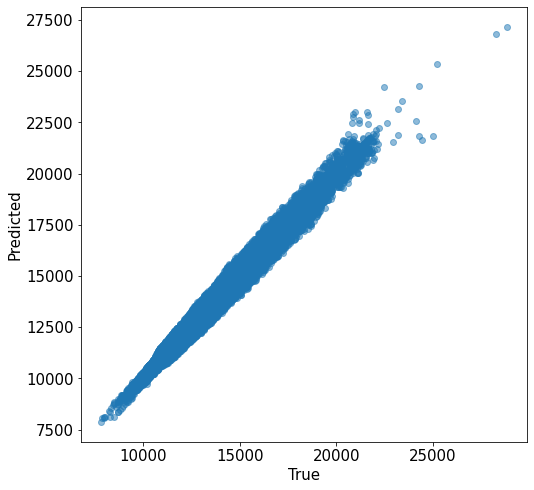

In [165]:
# Plot true vs predicted
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Predicted")

Text(0, 0.5, 'Residuals')

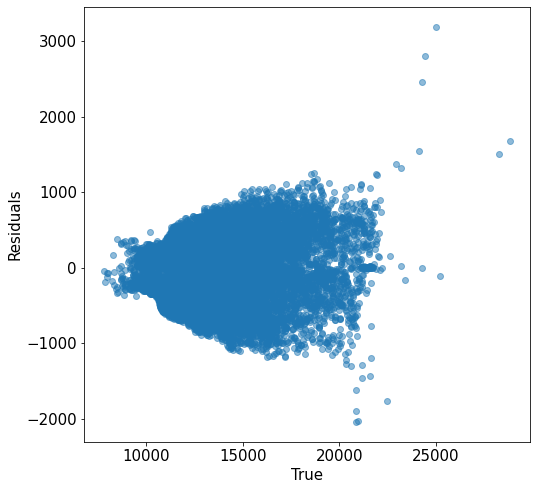

In [166]:
# Plot residuals
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['True'] - results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Residuals")

#### The model is accurate in that it has a high correlation, but we do use ranking as one features
#### The residuals do not have a constant variance

### Random Forest WITHOUT Rank

In [167]:
x = X[['Age', 'gender', 'country']]
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [168]:
# Regression Tree
regressor = RandomForestRegressor(random_state=19)
cross_val_score(regressor, x, y, cv=10)

array([-1.08815922e+01, -1.26543207e+01, -1.68276910e+00,  2.32480630e-01,
       -9.26674877e+00, -2.36736181e+00, -6.94124496e-03, -6.99715598e+00,
       -2.98447398e+00, -3.92141488e+00])

In [169]:
regressor.fit(X_train, y_train)
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [170]:
# MSE
print(mean_squared_error(y_train, train_pred))
print(mean_squared_error(y_test, test_pred))

# R2
print(r2_score(y_train, train_pred))
print(r2_score(y_test, test_pred))

5058204.176020318
5000896.602691912
0.18641579741693193
0.17326524486980788


In [171]:
# correlation
results = pd.DataFrame(columns = ['True', 'Predicted'])
results['True'] = y_test.values
results['Predicted'] = test_pred
results.head()

True     Predicted
0  12375.0  13214.023479
1  13878.0  13314.912215
2  11952.0  12794.172957
3  13153.0  13314.912215
4  17089.0  15380.850170

In [172]:
results.corr()

True  Predicted
True       1.000000   0.416741
Predicted  0.416741   1.000000

Text(0, 0.5, 'Predicted')

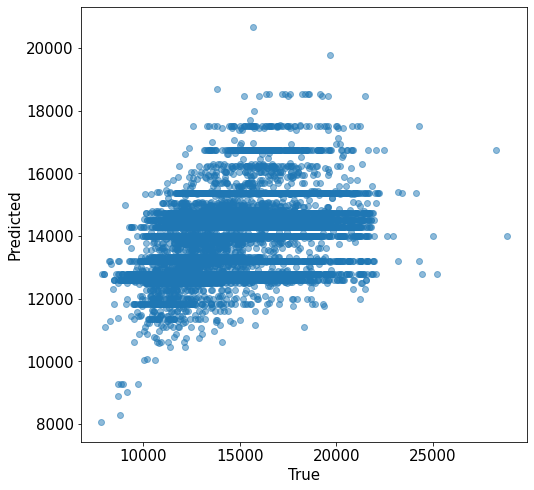

In [173]:
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Predicted")

Text(0, 0.5, 'Residuals')

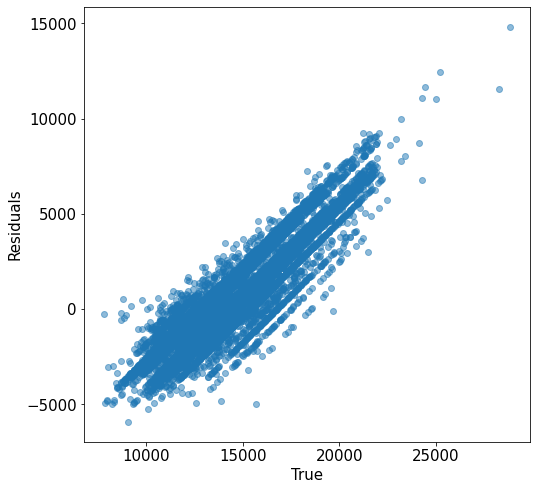

In [174]:
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['True'] - results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Residuals")

### This model is much less accurate than the last model. SO ranking played a big role in predicting the time of the runner. This makes sense because ranking depends on the runner's time. I was just curious to see how accurate a model can be using rank. If we wanted to predict marathon times, we could only use the features used in this model (Age, Gender, Country) because they are known before the race begins.

### Random Forest using 5K time, age, gender, country to predict finish time

In [189]:
X = df[['age_bins', 'Country', 'M/F', 5]]
y = df[42.195]

# preprocess categorical features
le = preprocessing.LabelEncoder()

le.fit(X['M/F'])
X['gender'] = le.transform(X['M/F']) 

le.fit(X['age_bins'])
X['Age'] = le.transform(X['age_bins'])

le.fit(X['Country'])
X['country'] = le.transform(X['Country']) 

x = X[['Age', 'gender', 'country', 5]]

# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

<ipython-input-189-9d1cceee57ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.transform(X['M/F'])
<ipython-input-189-9d1cceee57ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = le.transform(X['age_bins'])
<ipython-input-189-9d1cceee57ce>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [190]:
# Regression Tree
regressor = RandomForestRegressor(random_state=19)
cross_val_score(regressor, x, y, cv=10)

array([-1.015374  , -5.41379491, -1.68267363,  0.88648425, -2.69886772,
       -2.70000073,  0.77613752, -1.27783382, -3.78059638, -0.33718106])

In [191]:
regressor.fit(X_train, y_train)
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [192]:
# MSE
print(mean_squared_error(y_train, train_pred))
print(mean_squared_error(y_test, test_pred))

# R2
print(r2_score(y_train, train_pred))
print(r2_score(y_test, test_pred))

886915.0183178633
1464881.781192952
0.8573446182030537
0.7578296899765267


In [193]:
# correlation
results = pd.DataFrame(columns = ['True', 'Predicted'])
results['True'] = y_test.values
results['Predicted'] = test_pred
results.head()

True     Predicted
0  12375.0  13177.047852
1  13878.0  13686.417500
2  11952.0  10880.039223
3  13153.0  11833.380048
4  17089.0  18252.753000

In [194]:
results.corr()

True  Predicted
True       1.000000   0.872249
Predicted  0.872249   1.000000

Text(0, 0.5, 'Predicted')

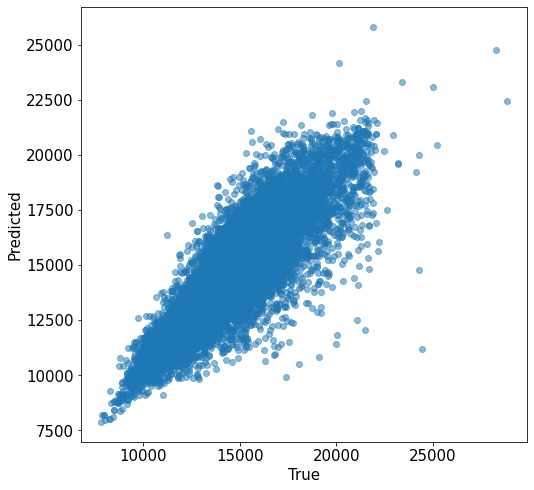

In [195]:
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Predicted")

Text(0, 0.5, 'Residuals')

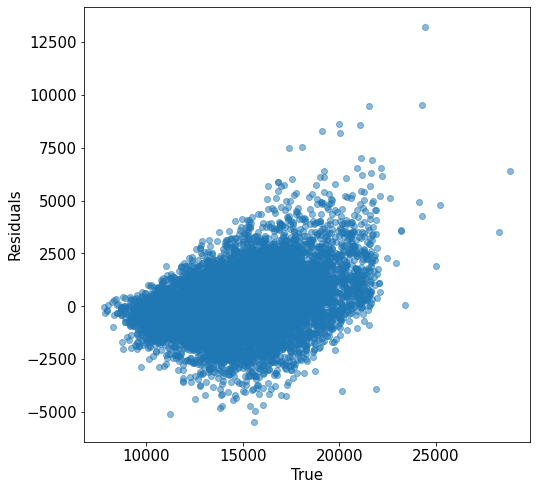

In [196]:
plt.figure(figsize = (8, 8))

plt.scatter(results['True'], results['True'] - results['Predicted'], alpha = 0.5)

plt.xlabel("True")
plt.ylabel("Residuals")

### Adding 5K time definitely makes the model more accurate. This makes sense because there were high correlations between 5K and overall times.

## Predict Age based on gender, age, rank
- Note: ages are unbalanced --> there are more people younger than 30 than there are older than 60 racing

In [197]:
df[df.Age < 30].shape

(12455, 20)

In [198]:
df[df.Age > 60].shape

(4651, 20)

In [199]:
y = df[['age_bins']]
X = df[['M/F', 'Country', 'Overall']] # use rank

In [200]:
# preprocess categorical features
le = preprocessing.LabelEncoder()

le.fit(X['M/F'])
X['gender'] = le.transform(X['M/F']) 

le.fit(X['Country'])
X['country'] = le.transform(X['Country'])

x = X[['gender', 'country', 'Overall']]

<ipython-input-200-6e526d6774d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.transform(X['M/F'])
<ipython-input-200-6e526d6774d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = le.transform(X['Country'])


In [201]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [202]:
# classification random forest
clf = RandomForestClassifier(random_state=19)
cross_val_score(clf, x, y, cv=10)

/Users/christinegarver/miniconda3/envs/poems/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christinegarver/miniconda3/envs/poems/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christinegarver/miniconda3/envs/poems/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christinegarver/miniconda3/envs/p

array([0.3270496 , 0.29288968, 0.23987854, 0.27947874, 0.29972166,
       0.25797065, 0.2332996 , 0.31009615, 0.27723649, 0.23003923])

In [203]:
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

<ipython-input-203-2b7b65f9f24a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [204]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         20s       0.24      0.24      0.24      2517
         30s       0.29      0.29      0.29      3936
         40s       0.34      0.35      0.35      4902
         50s       0.29      0.29      0.29      3283
         60s       0.16      0.17      0.17      1053
         70s       0.03      0.03      0.03       110
         80s       0.00      0.00      0.00         7

    accuracy                           0.29     15808
   macro avg       0.19      0.19      0.19     15808
weighted avg       0.29      0.29      0.29     15808



### KNN - predict age

In [205]:
neigh = KNeighborsClassifier(n_neighbors=2, weights = 'distance')
neigh.fit(X_train, y_train)

<ipython-input-205-8466f79ab980>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2, weights='distance')

In [206]:
pred = neigh.predict(X_test)

In [207]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         20s       0.22      0.30      0.25      2517
         30s       0.27      0.31      0.29      3936
         40s       0.33      0.31      0.32      4902
         50s       0.28      0.21      0.24      3283
         60s       0.15      0.09      0.11      1053
         70s       0.05      0.03      0.04       110
         80s       0.00      0.00      0.00         7

    accuracy                           0.27     15808
   macro avg       0.19      0.18      0.18     15808
weighted avg       0.27      0.27      0.27     15808



In [208]:
# KNN - predict age group based on overall time and gender
y = df[['age_bins']]
X = df[['M/F', 42.195]]

le = preprocessing.LabelEncoder()
le.fit(X['M/F'])
X['gender'] = le.transform(X['M/F']) 

<ipython-input-208-9119098095e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.transform(X['M/F'])


In [209]:
x = X[[42.195, 'gender']]

In [210]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)

<ipython-input-210-3ede909bcf7b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [211]:
pred = neigh.predict(X_test)
pred

array(['40s', '30s', '40s', ..., '40s', '20s', '30s'], dtype=object)

In [212]:
neigh.score(X_test, y_test)

0.2834640688259109

In [213]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         20s       0.21      0.33      0.26      2517
         30s       0.29      0.33      0.30      3936
         40s       0.35      0.32      0.34      4902
         50s       0.32      0.20      0.25      3283
         60s       0.18      0.09      0.12      1053
         70s       0.00      0.00      0.00       110
         80s       0.00      0.00      0.00         7

    accuracy                           0.28     15808
   macro avg       0.19      0.18      0.18     15808
weighted avg       0.29      0.28      0.28     15808



### The model without 'Country' as a feature has very similar accuracy scores to the model that uses gender, rank, and country as features. Therefore, comparing gender and rank is a better predictor of age compared to comparing country, gender, and rank.

## Look at top racers 
The models have trouble predicting who will be a top runner so let't take a closer look at the data

In [214]:
# Look at top performers (top 50)
top_females = df[(df['M/F'] == 'F') & (df['Overall'] < 51)]
top_males = df[(df['M/F'] == 'M') & (df['Overall'] < 51)]
print(top_females.shape)
print(top_males.shape)
top_runners = pd.concat([top_females, top_males])
print(top_runners.shape)

(15, 20)
(134, 20)
(149, 20)


In [215]:
top_females.sort_values(by = 'Overall')

Bib  Age M/F Country       5      10      15      20  21.0975      25  \
20   F3   37   F     KEN  1066.0  2098.0  3115.0  4130.0   4353.0  5151.0   
23  F11   27   F     BRN  1065.0  2098.0  3115.0  4130.0   4353.0  5150.0   
24  F23   25   F     USA  1065.0  2098.0  3115.0  4130.0   4353.0  5151.0   
28   F6   29   F     ETH  1102.0  2181.0  3239.0  4304.0   4532.0  5357.0   
30  F11   30   F     KEN  1019.0  2064.0  3109.0  4140.0   4365.0  5168.0   
31   F2   25   F     ETH  1018.0  2063.0  3108.0  4140.0   4365.0  5168.0   
32   F4   31   F     ETH  1102.0  2181.0  3240.0  4305.0   4532.0  5353.0   
33   F1   27   F     ETH  1017.0  2063.0  3109.0  4141.0   4365.0  5169.0   
33   F6   33   F     USA  1065.0  2097.0  3114.0  4129.0   4353.0  5153.0   
35  F11   27   F     KEN  1102.0  2181.0  3240.0  4305.0   4532.0  5353.0   
39  F10   31   F     USA  1020.0  2064.0  3108.0  4140.0   4365.0  5168.0   
43   F8   31   F     KEN  1019.0  2064.0  3109.0  4141.0   4366.0  5169.0   
43   F9   39   F     LAT  1102.0  2182.0  3249.0  4329.0   4559.0  5399.0   
43   F2   33   F     KEN  1065.0  2098.0  3114.0  4129.0   4353.0  5151.0   
48  F10   23   F     KEN  1102.0  2181.0  3239.0  4304.0   4532.0  5352.0   

        30      35      40  42.195  Gender  Overall  Division  Year UniqueID  \
20  6160.0  7121.0  8083.0  8512.0       1       21         1  2017   2017F3   
23  6160.0  7155.0  8142.0  8571.0       2       24         2  2017  2017F11   
24  6161.0  7166.0  8154.0  8580.0       3       25         3  2017  2017F23   
28  6418.0  7506.0  8509.0  8959.0       1       29         1  2016   2016F6   
30  6204.0  7250.0  8250.0  8695.0       1       31         1  2015  2015F11   
31  6203.0  7250.0  8250.0  8699.0       2       32         2  2015   2015F2   
32  6392.0  7469.0  8516.0  9003.0       2       33         2  2016   2016F4   
33  6204.0  7250.0  8250.0  8709.0       3       34         3  2015   2015F1   
33  6170.0  7213.0  8245.0  8706.0       4       34         4  2017   2017F6   
35  6393.0  7469.0  8539.0  9050.0       3       36         3  2016  2016F11   
39  6203.0  7249.0  8271.0  8739.0       4       40         4  2015  2015F10   
43  6204.0  7250.0  8282.0  8765.0       5       44         5  2015   2015F8   
43  6481.0  7592.0  8675.0  9148.0       4       44         4  2016   2016F9   
43  6160.0  7230.0  8347.0  8840.0       5       44         5  2017   2017F2   
48  6393.0  7470.0  8637.0  9193.0       5       49         5  2016  2016F10   

   age_bins  
20      30s  
23      20s  
24      20s  
28      20s  
30      30s  
31      20s  
32      30s  
33      20s  
33      30s  
35      20s  
39      30s  
43      30s  
43      30s  
43      30s  
48      20s

([<matplotlib.patches.Wedge at 0x14ca4e5e0>,
 [Text(1.1, 0.0, '40s'),
  Text(1.1, 0.0, '50s'),
  Text(1.1, 0.0, '60s'),
  Text(1.1, 0.0, '70s'),
  Text(1.1, 0.0, '80s'),
  Text(0.11498130276606913, 1.0939740856227893, '20s'),
  Text(-0.11498120034082238, -1.093974096388111, '30s')],
 [Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.0627170742360377, 0.5967131376124304, '46.7%'),
  Text(-0.0627170183677213, -0.5967131434844241, '53.3%')])

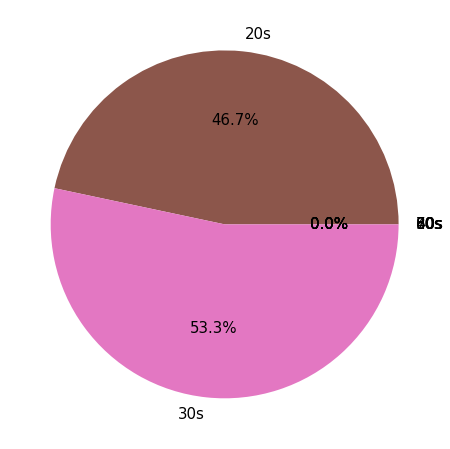

In [216]:
# Pie Chart of Age Bin
counts = top_females.groupby(['age_bins']).agg('count')
type_labels = counts.Year.sort_values().index 
type_counts = counts.Year.sort_values()
plt.figure(figsize = (8, 8))
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x15d3f18b0>,
 [Text(1.075962358309037, 0.22870287165240302, 'BRN'),
  Text(0.8899186726249574, 0.6465638066837907, 'LAT'),
  Text(0.11498125155344606, 1.0939740910054512, 'USA'),
  Text(-1.075962385074915, 0.22870274572881866, 'ETH'),
  Text(0.3399188701202255, -1.0461621106387813, 'KEN')],
 [Text(0.5868885590776565, 0.12474702090131072, '6.7%'),
  Text(0.48541018506815853, 0.3526711672820676, '6.7%'),
  Text(0.06271704630187966, 0.5967131405484278, '20.0%'),
  Text(-0.5868885736772262, 0.12474695221571926, '26.7%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

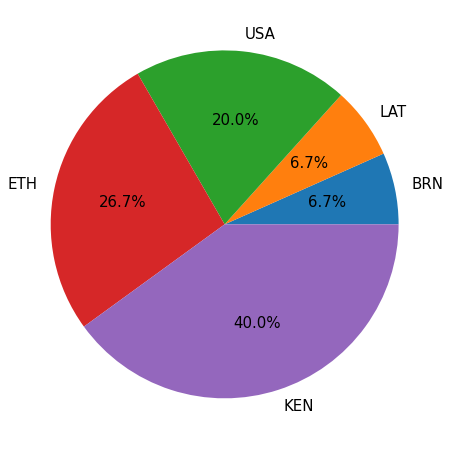

In [217]:
# Pie Chart of Country
counts = top_females.groupby(['Country']).agg('count')
type_labels = counts.Year.sort_values().index 
type_counts = counts.Year.sort_values()
plt.figure(figsize = (8, 8))
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x14c9b2b20>,
 [Text(1.1, 0.0, '60s'),
  Text(1.1, 0.0, '70s'),
  Text(1.1, 0.0, '80s'),
  Text(1.0996977036348738, 0.025786830363300053, '50s'),
  Text(1.0235118235618663, 0.40301804801902247, '40s'),
  Text(-0.4970903662686093, 0.981275276241555, '30s'),
  Text(0.12865089114179162, -1.0924508905247974, '20s')],
 [Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.6, 0.0, '0.0%'),
  Text(0.5998351110735675, 0.0140655438345273, '0.7%'),
  Text(0.5582791764882907, 0.21982802619219408, '10.4%'),
  Text(-0.2711401997828778, 0.5352410597681209, '42.5%'),
  Text(0.07017321335006815, -0.5958823039226168, '46.3%')])

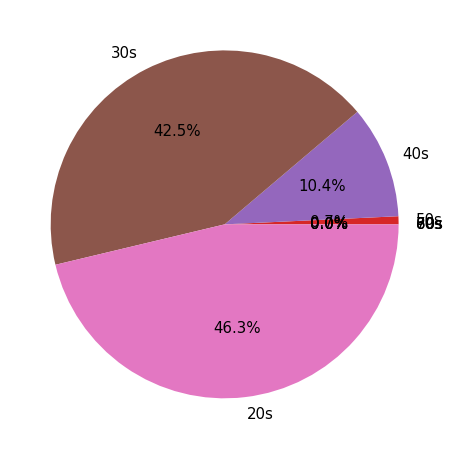

In [218]:
# Pie Chart of age bins
male_counts = top_males.groupby(['age_bins']).agg('count')
type_labels = male_counts.Bib.sort_values().index 
type_counts = male_counts.Bib.sort_values()
plt.figure(figsize = (8, 8))
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x16de13730>,
 [Text(1.0996977036348738, 0.025786830363300053, 'ESP'),
  Text(1.0972803295290035, 0.07730380604292164, 'MEX'),
  Text(1.0924508952299397, 0.12865085118763742, 'NED'),
  Text(1.0852200168819026, 0.17971509385369816, 'RSA'),
  Text(1.075603589524068, 0.2303842837585501, 'RUS'),
  Text(1.0636227521498245, 0.28054703903130584, 'UGA'),
  Text(1.0493038412386784, 0.33009309105425827, 'UKR'),
  Text(1.0235118294576901, 0.40301803304588296, 'BRA'),
  Text(0.9812752922400091, 0.4970903346870515, 'ZIM'),
  Text(0.9164036143826066, 0.6084442583725274, 'ITA'),
  Text(0.804684479696252, 0.7499885920038867, 'CAN'),
  Text(0.5648216327756022, 0.9439155275493157, 'JPN'),
  Text(0.1286508911417914, 1.0924508905247976, 'ETH'),
  Text(-0.4505493571495686, 1.0034965255406272, 'KEN'),
  Text(-0.4505494099987637, -1.003496501812421, 'USA')],
 [Text(0.5998351110735675, 0.0140655438345273, '0.7%'),
  Text(0.5985165433794564, 0.04216571238704816, '0.7%'),
  Text(0

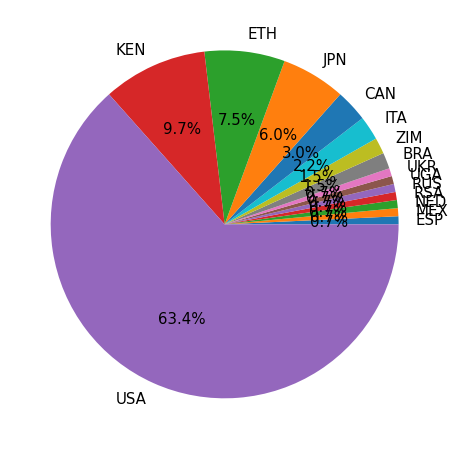

In [219]:
# Pie Chart of Country
male_counts = top_males.groupby(['Country']).agg('count')
type_labels = male_counts.Bib.sort_values().index 
type_counts = male_counts.Bib.sort_values()
plt.figure(figsize = (8, 8))
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%')

- Only 15 females place in the top 50.
- 40% of those women are from KEN.
- 135 males place in the top 50.
- 63% of those men are from USA.
- All the top female racers were in their 20s or 30s (however, there were only 15 women).
- Most male top racers were in their 20s and 30s, but there were still top racers older than 30.

## Predict overall place given 5K, age, gender, country
Just for fun, I want to test one model that predicts rank using one measured time (we'll look at the very beginning of the race. Since there was such a high correlation between the different times and ranks, I want to see how accurat a random forest is.

In [220]:
datatable = df.dropna()

In [221]:
X = datatable[['age_bins', 'M/F', 'Country', 5]]
y = datatable['Overall']

le = preprocessing.LabelEncoder()

le.fit(X['M/F'])
X['gender'] = le.transform(X['M/F']) 

le.fit(X['Country'])
X['country'] = le.transform(X['Country'])

le.fit(X['age_bins'])
X['Age'] = le.transform(X['age_bins'])

x = X[['Age', 'gender', 'country', 5]]
x.dropna(inplace = True)

<ipython-input-221-3ef5291523f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.transform(X['M/F'])
<ipython-input-221-3ef5291523f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = le.transform(X['Country'])
<ipython-input-221-3ef5291523f5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [222]:
# split rankings into buckets --> we have so many different rankings
y['ranking'] = pd.cut(x=y, bins=[0, 50, 500, 1000,
                                            2000, 4000, 8000,
                                12000, 16000, 20000,
                                24000, 27000], labels = ['first', 'second', 'third',
                                                        'fourth', 'fifth', 'sixth', 'seventh',
                                                        'eighth', 'ninth', 'tenth', 'eleventh'])

<ipython-input-222-d98a0d5001e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['ranking'] = pd.cut(x=y, bins=[0, 50, 500, 1000,


In [223]:
X_train, X_test, y_train, y_test = train_test_split(x, y['ranking'], test_size=0.2, random_state=19)

In [224]:
clf = RandomForestClassifier(random_state=0)

In [225]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [226]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      eighth       0.36      0.33      0.34      2379
    eleventh       0.66      0.63      0.64      1467
       fifth       0.36      0.41      0.38      1167
       first       0.71      0.59      0.65        34
      fourth       0.29      0.26      0.27       592
       ninth       0.40      0.36      0.38      2415
      second       0.51      0.56      0.53       270
     seventh       0.37      0.40      0.39      2404
       sixth       0.43      0.50      0.46      2450
       tenth       0.49      0.44      0.46      2338
       third       0.28      0.29      0.28       292

    accuracy                           0.42     15808
   macro avg       0.44      0.43      0.44     15808
weighted avg       0.42      0.42      0.42     15808



- very top runners are easier to predict
- very bottom runners are easier to predict
- hardest to predict average runners

## Summary
Basically, on average, younger men appear to run the fastest (based off the pie charts and distributions). BUT, 
when it comes to a marathon (at least the Boston Marathon), the first 5K is a better predictor (than gender and age) of your overall performance. The prediction models had the highest accuracy when the 5K time was a parameter. Most runners keep a steady pace throughout the race -
probably due to disciplined training. Therefore, when you sign up for a race,
don't worry about your age or gender. While it takes training and discipline to reach a goal pace, it's doable. Just focus on training. Focus on how
you are going to start and end the race.